## Projeto - Analise de Dados e Previsão de Preços de Alugueis - VICTOR TINTEL
<p> Nesse projeto precisaremos fazer uma série de analise de dados para responder algumas perguntas e criar um modelo de Machine Learning para prever valores, ou seja, um modelo de regressão linear.
    
<p> Fonde de dados: https://www.kaggle.com/datasets/shashanks1202/apartment-rent-data    

### Dicionário de dados: Descrição a que se refere cada variável do conjunto de dados

<p><p><p>
<br>id = Identificador do imóvel
<br>category = Categoria do imóvel
<br>title = Titulo do anuncio
<br>body  = Descrição do anuncio
<br>amenities = Comunidades do imóvel
<br>bathrooms = Quantidade de banheiros
<br>bedrooms = Quantidade de quartos
<br>currency = Moeda
<br>fee = Valor de taxas extras
<br>has_photo = Se o imóvel possui foto
<br>pets_allowed = Se o imóvel possui pets
<br>price = Valor do aluguel mensal - Variável TARGET
<br>price_display = Valor do aluguel mensal exibido
<br>price_type = Tipo de aluguel
<br>square_feet = Tamanho do imóvel (Para converter para metros quadrados basta dividir por 10.76)
<br>address = Endereço do imóvel
<br>cityname = Cidade do imóvel
<br>state = Estado do imóvel
<br>latitude = Latitude do imóvel
<br>longitude = Longitude do imóvel
<br>source = Fonte / Tipo de imobiliária que o imóvel está disponível pra alugar
<br>time  = Hora que o anuncio foi inserido

### 1º Passo - Definição do Problema de Negócio / Objetivo
<p> Identificar qual imobiliaria possui a maior quantidade de imóveis para alugar
<p> Identificar qual estado possui a maior quantidade de imóveis para alugar
<p> Identificar a média de dias que os imóveis estão disponíveis para alugar e também os dias mínimos e máximos
<p> Identificar o valor médio do aluguél do imóvel por estado
<p> Identificar quantos imóveis tem piscina e quantos tem academia
<p> Criar um modelo preditivo para gerar previsões dos valores de aluguel, demonstrando para seu chefe/cliente que você avaliou o modelo para garantir que o mesmo não está gerando overfitting
<p> Apresentar o calculo das métricas e explicar o erro do modelo, garantindo que seja um valor baixo de erro.

### 2º Passo - Coleta de Dados e Importação dos Pacotes
<p> Vamos coletar os dados que serão utilizados e importar os pacotes que iremos utilizar

In [8]:
# Instalando o pacote folium (Caso ainda não tenha instalado)
!pip install folium

In [7]:
# Carregando os pacotes que serão utilizados

# Utilizado para analise e manipulação dos dados
import pandas as pd
import numpy as np


from sklearn import neighbors

# Utilizado para trabalharmos com datas
#import datetime
from datetime import date

# Utilizado para geração de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# !pip install xgboost - Caso nunca tenha utilizado, primeiro será necessário instalar o pacote
# Tipo de algoritmo para criarmos nosso modelo preditivo
#from xgboost import XGBRegressor

# Utilizado para separar os dados em treino e teste
from sklearn.model_selection import train_test_split

# Tipos de algoritmos para criarmos nosso modelo preditivo
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#from sklearn import neighbors

import datetime

import folium
from folium import plugins

from category_encoders.one_hot import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder



from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


# Utilizado para avaliarmos as métricas dos modelos
from sklearn import metrics

# Utilizado para fazer a normalização dos dados
from sklearn.preprocessing import MinMaxScaler

# Utilizado para fazer a padronização dos dados
from sklearn.preprocessing import StandardScaler


import joblib

# Utilizado para não exibir infomrações de alertas, nesse caso não exibiremos apenas alertas de versões futuras
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)

#Comando para exibir todas colunas e linhas do arquivo
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.options.display.float_format = '{:.2f}'.format


In [9]:
# Coletando os dados a serem utilizados
df_original = pd.read_csv('apartments_for_rent_classified_100K.csv', sep=";", encoding='ISO-8859-1', low_memory = False)

### 3º Passo - Analise Exploratória / Analise de Dados
<p> Vamos realizar diversas analises em nossos dados para identificar insights e situações que deverão ser tratadas.

In [14]:
# Visualizando as primeiras linhas do nosso DataFrame
df_original.head(3)

id                category                            title  \
0  5668640009  housing/rent/apartment       One BR 507 & 509 Esplanade   
1  5668639818  housing/rent/apartment      Three BR 146 Lochview Drive   
2  5668639686  housing/rent/apartment  Three BR 3101 Morningside Drive   

                                                body amenities  bathrooms  \
0  This unit is located at 507 & 509 Esplanade, R...       NaN        1.0   
1  This unit is located at 146 Lochview Drive, Ne...       NaN        1.5   
2  This unit is located at 3101 Morningside Drive...       NaN        2.0   

   bedrooms currency fee  has_photo pets_allowed   price price_display  \
0       1.0      USD  No  Thumbnail         Cats  2195.0        $2,195   
1       3.0      USD  No  Thumbnail    Cats,Dogs  1250.0        $1,250   
2       3.0      USD  No  Thumbnail          NaN  1395.0        $1,395   

  price_type  square_feet              address       cityname state  latitude  \
0    Monthly        542.0   507  509 Esplanade  Redondo Beach    CA   33.8520   
1    Monthly       1500.0      146 Lochview Dr   Newport News    VA   37.0867   
2    Monthly       1650.0  3101 Morningside Dr        Raleigh    NC   35.8230   

   longitude     source          time  
0  -118.3759  RentLingo  1.577360e+09  
1   -76.4941  RentLingo  1.577360e+09  
2   -78.6438  RentLingo  1.577360e+09

In [16]:
# Visualizando as ultimas linhas do nosso DataFrame
df_original.tail(3)

id                category  \
93280  5121868503  housing/rent/apartment   
93281  5121868217  housing/rent/apartment   
93282  5121867575  housing/rent/apartment   

                                         title  \
93280         One BR/ One BA - JUST REMODELED!   
93281  Apartment for rent in for $905. Dog OK!   
93282                         Rockville Value!   

                                                    body  \
93280  MOVE IN SPECIAL: 1/2 OFF 1st MONTH RENT - BRAN...   
93281  Square footage range: 965 - 965. Pet condition...   
93282      luxury apartment Grosvenor-Strathmore Metro s   

                                          amenities  bathrooms  bedrooms  \
93280  Dishwasher,Parking,Refrigerator,Washer Dryer        1.0       1.0   
93281                                    Gym,Tennis        2.0       2.0   
93282                                           NaN        NaN       NaN   

      currency  fee has_photo pets_allowed   price price_display price_type  \
93280      USD   No       Yes          NaN  2350.0        $2,350    Monthly   
93281      USD   No       Yes    Cats,Dogs   905.0          $905    Monthly   
93282      NaN  NaN       NaN          NaN     NaN           NaN        NaN   

       square_feet address       cityname state  latitude  longitude  \
93280        668.0     NaN  Santa Barbara    CA   34.4301  -119.6812   
93281        965.0     NaN       Pasadena    TX   29.6500   -95.1847   
93282          NaN     NaN            NaN   NaN       NaN        NaN   

             source          time  
93280  RentDigs.com  1.544236e+09  
93281  RentDigs.com  1.544236e+09  
93282           NaN           NaN

In [18]:
# Vamos renomear a coluna do nosso arquivo para deixar a nomenclatura mais amigável(Em Português)
df_original.columns = ['ID_Imovel', 
              'Categoria', 
              'Titulo', 
              'Descricao', 
              'Comodidades', 
              'Banheiros',
              'Quartos',
              'Moeda',
              'Taxa',
              'Foto_Anuncio',                       
              'Permite_Pets',
              'VL_Aluguel',
              'VL_Aluguel_Exibido',
              'Tipo_Aluguel',
              'Tamanho',                       
              'Endereco',
              'Cidade',
              'Estado',
              'Latitude',
              'Longitude',
              'Imobiliaria',
              'Inclusao']              

In [20]:
# Visualizando nosso DataFrame após a alteração
# Algumas variaveis não teremos necessidade de utilizar e iremos ajustar isso na etapa de tratamento de dados

df_original.head(3)

ID_Imovel               Categoria                           Titulo  \
0  5668640009  housing/rent/apartment       One BR 507 & 509 Esplanade   
1  5668639818  housing/rent/apartment      Three BR 146 Lochview Drive   
2  5668639686  housing/rent/apartment  Three BR 3101 Morningside Drive   

                                           Descricao Comodidades  Banheiros  \
0  This unit is located at 507 & 509 Esplanade, R...         NaN        1.0   
1  This unit is located at 146 Lochview Drive, Ne...         NaN        1.5   
2  This unit is located at 3101 Morningside Drive...         NaN        2.0   

   Quartos Moeda Taxa Foto_Anuncio Permite_Pets  VL_Aluguel  \
0      1.0   USD   No    Thumbnail         Cats      2195.0   
1      3.0   USD   No    Thumbnail    Cats,Dogs      1250.0   
2      3.0   USD   No    Thumbnail          NaN      1395.0   

  VL_Aluguel_Exibido Tipo_Aluguel  Tamanho             Endereco  \
0             $2,195      Monthly    542.0   507  509 Esplanade   
1             $1,250      Monthly   1500.0      146 Lochview Dr   
2             $1,395      Monthly   1650.0  3101 Morningside Dr   

          Cidade Estado  Latitude  Longitude Imobiliaria      Inclusao  
0  Redondo Beach     CA   33.8520  -118.3759   RentLingo  1.577360e+09  
1   Newport News     VA   37.0867   -76.4941   RentLingo  1.577360e+09  
2        Raleigh     NC   35.8230   -78.6438   RentLingo  1.577360e+09

In [22]:
# Visualizando o tamanho do nosso conjunto de dados
df_original.shape

(93283, 22)

In [24]:
#Informações sobre tipos de variáveis
df_original.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93283 entries, 0 to 93282
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Imovel           93283 non-null  int64  
 1   Categoria           93283 non-null  object 
 2   Titulo              93283 non-null  object 
 3   Descricao           93283 non-null  object 
 4   Comodidades         77702 non-null  object 
 5   Banheiros           93219 non-null  float64
 6   Quartos             93164 non-null  float64
 7   Moeda               93282 non-null  object 
 8   Taxa                93282 non-null  object 
 9   Foto_Anuncio        93282 non-null  object 
 10  Permite_Pets        36547 non-null  object 
 11  VL_Aluguel          93281 non-null  float64
 12  VL_Aluguel_Exibido  93281 non-null  object 
 13  Tipo_Aluguel        93282 non-null  object 
 14  Tamanho             93282 non-null  float64
 15  Endereco            7943 non-null   object 
 16  Cida

In [26]:
# Verificando se há valores nulos no DataFrame
# Há necessidade de tratar esses valores nulos na etapa de tratamento de dados
df_original.isnull().sum()

ID_Imovel                 0
Categoria                 0
Titulo                    0
Descricao                 0
Comodidades           15581
Banheiros                64
Quartos                 119
Moeda                     1
Taxa                      1
Foto_Anuncio              1
Permite_Pets          56736
VL_Aluguel                2
VL_Aluguel_Exibido        2
Tipo_Aluguel              1
Tamanho                   1
Endereco              85340
Cidade                  303
Estado                  303
Latitude                 26
Longitude                26
Imobiliaria               1
Inclusao                  1
dtype: int64

In [28]:
# Vamos analisar os valores únicos de cada variável
# Isso é importante no nosso processo de analise exploratória para identificarmos as colunas que iremos tratar como categoricas
# e também retirar do dataset
valores_unicos = []
for i in df_original.columns[0:22].tolist():
    print(i, ':', len(df_original[i].astype(str).value_counts()))
    valores_unicos.append(len(df_original[i].astype(str).value_counts()))
    
# Uma forma mais simples de visualizar os valores únicos também seria utilizando o comando abaixo
# df_original.nunique()


ID_Imovel : 93199
Categoria : 7
Titulo : 55210
Descricao : 88619
Comodidades : 9286
Banheiros : 17
Quartos : 11
Moeda : 2
Taxa : 3
Foto_Anuncio : 4
Permite_Pets : 5
VL_Aluguel : 3619
VL_Aluguel_Exibido : 3650
Tipo_Aluguel : 4
Tamanho : 2493
Endereco : 7772
Cidade : 2887
Estado : 52
Latitude : 6891
Longitude : 6939
Imobiliaria : 26
Inclusao : 69632


In [30]:
# Visualizando medidas estatísticas para variáveis numéricas
df_original.describe()

ID_Imovel     Banheiros       Quartos    VL_Aluguel       Tamanho  \
count  9.328300e+04  93219.000000  93164.000000  93281.000000  93282.000000   
mean   5.374055e+09      1.443976      1.728393   1527.404788    955.763084   
std    1.800943e+08      0.546877      0.749234    907.423666    420.746911   
min    5.121046e+09      1.000000      0.000000    100.000000    101.000000   
25%    5.198170e+09      1.000000      1.000000   1015.000000    728.000000   
50%    5.508732e+09      1.000000      2.000000   1355.000000    900.000000   
75%    5.509028e+09      2.000000      2.000000   1795.000000   1115.000000   
max    5.669439e+09      9.000000      9.000000  52500.000000  50000.000000   

           Latitude     Longitude      Inclusao  
count  93257.000000  93257.000000  9.328200e+04  
mean      37.048661    -91.592452  1.560692e+09  
std        4.564219     15.888387  1.064718e+07  
min       19.666000   -159.369800  1.544174e+09  
25%       33.771800   -104.828200  1.550840e+09  
50%       37.436700    -84.538200  1.568748e+09  
75%       39.964300    -77.494800  1.568769e+09  
max       61.594000    -68.778800  1.577391e+09

In [32]:
# Fazer um agrupamento para verificar quantas observações temos para cada tipo da variável Estado 
df_original.groupby(['Estado']).size()

Estado
AK       53
AL      271
AR      598
AZ     2214
CA     9473
CO     6290
CT      509
DC       93
DE        7
FL     5194
GA     4290
HI       29
IA      301
ID       77
IL      852
IN      376
KS      903
KY      995
LA     1345
MA     4917
MD     5043
ME       32
MI      545
MN      444
MO     1081
MS       56
MT       87
NC     5763
ND      743
NE     1020
NH      735
NJ     4445
NM       24
NV     2815
NY      475
OH     4905
OK      934
OR      248
PA      984
RI       90
SC      644
SD       77
TN      813
TX    10403
UT      638
VA     8036
VT      125
WA     2590
WI      375
WV        9
WY       14
dtype: int64

In [34]:
# Fazer um agrupamento para verificar quantas observações temos para cada tipo da variável Imobiliaria
df_original.groupby(['Imobiliaria']).size()

Imobiliaria
AgentWebsite             1
Apartable                1
BostonApartments        94
Claz                     8
FreeAdsTime              1
GoSection8             437
Home Rentals             8
HousesForRent            1
Listanza                29
ListedBuy              571
Nest Seekers             5
RENTCafé                41
RENTOCULAR              18
Real Estate Agent        1
Real Estate Shows        1
RealRentals            268
RentDigs.com         84702
RentFeeder              12
RentLingo             6924
Seattle Rentals          2
SpreadMyAd              22
Z57                      1
rentbits                 5
tenantcloud            124
vFlyer                   5
dtype: int64

In [36]:
# Fazer um agrupamento para verificar quantas observações temos para cada tipo da variável Tipo_Aluguel
df_original.groupby(['Tipo_Aluguel']).size()

Tipo_Aluguel
Monthly           93278
Monthly|Weekly        1
Weekly                3
dtype: int64

In [38]:
# Fazer um agrupamento para verificar quantas observações temos para cada variavel Taxa
df_original.groupby(['Taxa']).size()

Taxa
No     93081
Yes      201
dtype: int64

In [40]:
# Fazer um agrupamento para verificar quantas observações temos para cada tipo da variável Categoria
df_original.groupby(['Categoria']).size()

Categoria
housing/rent                          7
housing/rent/apartment            93222
housing/rent/commercial/retail       42
housing/rent/condo                    3
housing/rent/home                     4
housing/rent/other                    1
housing/rent/short_term               4
dtype: int64

In [42]:
# Fazer um agrupamento para verificar quantas observações temos para cada variavel Permite_Pets
df_original.groupby(['Permite_Pets']).size()

Permite_Pets
Cats               1744
Cats,Dogs         34675
Cats,Dogs,None        1
Dogs                127
dtype: int64

In [44]:
# Fazer um agrupamento para verificar quantas observações temos para cada variavel Comodidades
df_original.groupby(['Comodidades']).size()

Comodidades
AC                                                                                                                                                                                           258
AC,Alarm,Basketball,Cable or Satellite,Clubhouse,Dishwasher,Gated,Gym,Hot Tub,Parking,Playground,Pool,Refrigerator,Washer Dryer                                                                3
AC,Alarm,Basketball,Cable or Satellite,Clubhouse,Dishwasher,Gated,Gym,Hot Tub,Playground,Pool,Refrigerator,Washer Dryer                                                                        4
AC,Alarm,Basketball,Dishwasher,Garbage Disposal,Gated,Pool,Storage,Tennis                                                                                                                      1
AC,Alarm,Basketball,Dishwasher,Gym,Patio/Deck,Tennis,Washer Dryer                                                                                                                              3
AC,Alarm,Basketball,Dis

In [46]:
# Fazer um agrupamento para verificar quantas observações temos para cada variavel VL_Aluguel
df_original.groupby(['VL_Aluguel']).size()

VL_Aluguel
100.00        1
200.00        2
224.00        1
264.00        1
275.00        1
285.00        1
288.00        1
299.00        1
300.00        3
309.00        1
310.00        1
312.00        1
313.00        1
317.00        1
322.00        1
325.00        3
337.00        1
340.00        1
345.00        1
350.00       12
354.00        1
357.00        1
359.00        1
360.00        1
365.00        2
369.00        1
370.00        2
375.00       13
380.00        1
382.00        1
385.00        3
386.00        1
390.00        2
395.00        7
399.00        1
400.00       30
405.00        1
410.00        1
415.00        5
420.00        5
424.00        2
425.00       32
428.00        2
429.00        2
430.00        5
435.00        6
438.00        1
439.00        1
440.00        5
445.00        7
449.00        7
450.00       52
451.00        2
452.00        1
455.00        9
459.00        1
460.00        1
462.00        1
463.00        4
465.00       15
466.00        1
468.00       

In [48]:
# Conforme observamos através do comendo Describe um pouco acima, temos algumas variaveis que possuem um valor máximo
# bem elevando, como por exemplo o valor de aluguel, vamos observar mais em detalhes algumas dessas variaveis

In [50]:
# Vamos identificar os casos em que a variavel VL_Aluguel é superior 30000
# 7 observações nesta condição
df_original.loc[(df_original['VL_Aluguel'] > 30000)].head(10)

ID_Imovel               Categoria  \
6863   5666447277  housing/rent/apartment   
17131  5508899537  housing/rent/apartment   
28037  5508903100  housing/rent/apartment   
38473  5508885857  housing/rent/apartment   
40715  5508903015  housing/rent/apartment   
40932  5508880122  housing/rent/apartment   
45817  5508991189  housing/rent/apartment   

                                                  Titulo  \
6863                           Studio apartment for rent   
17131                        Four BR - ready to move in.   
28037       Pet Friendly 6+5 Apartment in West Hollywood   
38473  Average Rent $32,000 a month - That's a STEAL....   
40715  Stunning estate in the heart of /Sunset, just ...   
40932     Average Rent $40,000 a month - That's a STEAL!   
45817         Apartment in great location. 2 Car Garage!   

                                               Descricao  \
6863   Barstow It's 14/18ft. studio apartment furnish...   
17131  Stunning, recently renovated home in the with ...   
28037  This state of the art and renovated showplace ...   
38473  This spectacular estate boasts four story of l...   
40715  Newly complete furnished, available for long o...   
40932  A luxurious 3 level Mediterranean villa nestle...   
45817  Situated in the heart of 1 of the country's mo...   

                                             Comodidades  Banheiros  Quartos  \
6863   AC,Cable or Satellite,Internet Access,Patio/De...        1.0      0.0   
17131                                            Parking        4.0      4.0   
28037  Dishwasher,Elevator,Fireplace,Parking,Patio/De...        5.0      7.0   
38473           Elevator,Fireplace,Parking,Patio/Deck,TV        9.0      6.0   
40715                   Elevator,Hot Tub,Patio/Deck,Pool        7.5      6.0   
40932  Clubhouse,Elevator,Fireplace,Gated,Gym,Parking...        8.0      6.0   
45817                                            Parking        2.5      3.0   

      Moeda Taxa Foto_Anuncio Permite_Pets  VL_Aluguel VL_Aluguel_Exibido  \
6863    USD   No    Thumbnail          NaN     52500.0            $52,500   
17131   USD   No    Thumbnail          NaN     35000.0            $35,000   
28037   USD   No           No          NaN     35000.0            $35,000   
38473   USD   No          Yes          NaN     32000.0            $32,000   
40715   USD   No           No          NaN     35000.0            $35,000   
40932   USD   No          Yes          NaN     40000.0            $40,000   
45817   USD   No          Yes          NaN     33165.0            $33,165   

      Tipo_Aluguel  Tamanho           Endereco             Cidade Estado  \
6863       Monthly   1418.0  1101 Pueblo Drive            Barstow     CA   
17131      Monthly   2269.0                NaN     West Hollywood     CA   
28037      Monthly   5586.0                NaN     West Hollywood     CA   
38473      Monthly   5055.0                NaN        Los Angeles     CA   
40715      Monthly   6366.0                NaN     West Hollywood     CA   
40932      Monthly   7145.0                NaN        Los Angeles     CA   
45817      Monthly   2211.0                NaN  Pacific Palisades     CA   

       Latitude  Longitude   Imobiliaria      Inclusao  
6863    34.8870  -117.0350  RentDigs.com  1.577186e+09  
17131   34.0939  -118.3801  RentDigs.com  1.568760e+09  
28037   34.0939  -118.3801  RentDigs.com  1.568761e+09  
38473   34.1176  -118.3327  RentDigs.com  1.568760e+09  
40715   34.0939  -118.3801  RentDigs.com  1.568761e+09  
40932   34.0584  -118.4135  RentDigs.com  1.568759e+09  
45817   34.0504  -118.5362  RentDigs.com  1.568766e+09

In [52]:
# Vamos verificar quantos casos temos com um valor de aluguel acima de 10000

# Estou gerando um novo DataFrame a partir do filtro que fizemos
# Também é possível utilizar este comando para verificar os valores agrupados com o filtro
# df_original[df_original['VL_Aluguel'] > 20000].groupby([df_original.index.any,'VL_Aluguel']).size()
df_contagem = df_original.loc[(df_original['VL_Aluguel'] > 10000)]

# Exibindo a informação
print('Quantidade de observações: ', df_contagem.shape[0])

# Excluindo o DataFrame porque não iremos mais utiliza-lo, criamos apenas para contagem e pra demonstração.
#del df_contagem

Quantidade de observações:  67


In [54]:
# Verificando os valores agrupados 
df_contagem.groupby(['VL_Aluguel']).size()

VL_Aluguel
10600.0    1
11000.0    7
11200.0    1
11450.0    1
11500.0    2
12000.0    5
12500.0    3
12600.0    1
12995.0    2
13000.0    2
13278.0    1
13500.0    4
13750.0    1
13900.0    1
13995.0    1
14000.0    4
14500.0    1
14700.0    1
14850.0    1
14950.0    1
15000.0    4
15362.0    1
17000.0    2
19500.0    1
20000.0    1
23000.0    1
24900.0    1
25000.0    4
29000.0    1
29500.0    2
30000.0    1
32000.0    1
33165.0    1
35000.0    3
40000.0    1
52500.0    1
dtype: int64

In [57]:
#carregar variaveis para plot
variaveis_numericas = []
for i in df_original.columns[0:22].tolist():
        if df_original.dtypes[i] == 'int64' or df_original.dtypes[i] == 'float64':                        
            variaveis_numericas.append(i)  

In [59]:
#Variaveis numéricas
variaveis_numericas

['ID_Imovel',
 'Banheiros',
 'Quartos',
 'VL_Aluguel',
 'Tamanho',
 'Latitude',
 'Longitude',
 'Inclusao']

In [61]:
# Algumas dessa variáveis não precisamos analisar pois iremos descarta-las, então podemos retirar da nossa lista
variaveis_numericas = ['Banheiros','Quartos','VL_Aluguel','Tamanho']

In [63]:
#Quantidade de variaveis
len(variaveis_numericas)

4

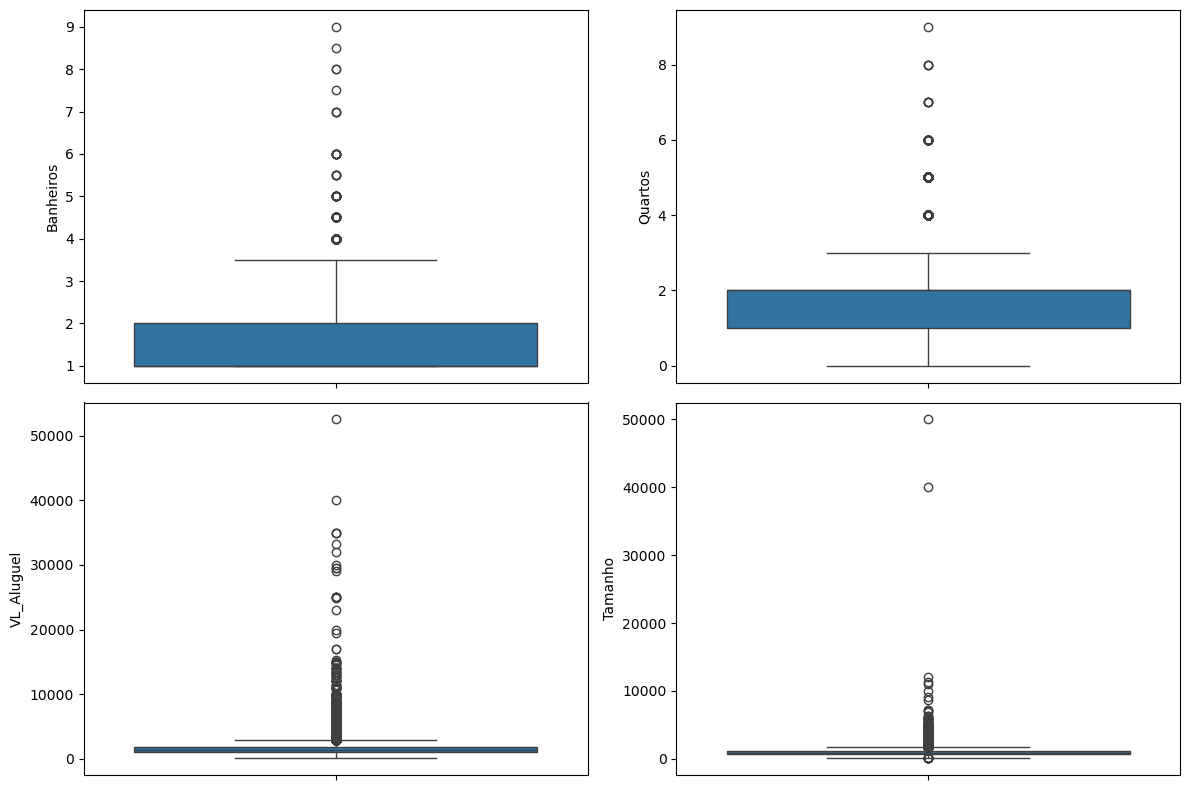

In [65]:
#Podemos observar nos boxplots abaixo que as variáveis númericas apresentam uma grande quantidade de "possíveis" outliers
#Precisamos avaliar cada uma dessas variaveis dentro do contexto dos dados para saber se realmente iremos trata-las como outlier

plt.rcParams["figure.figsize"] = [12.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2) #2 linhas e 2 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_original, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()

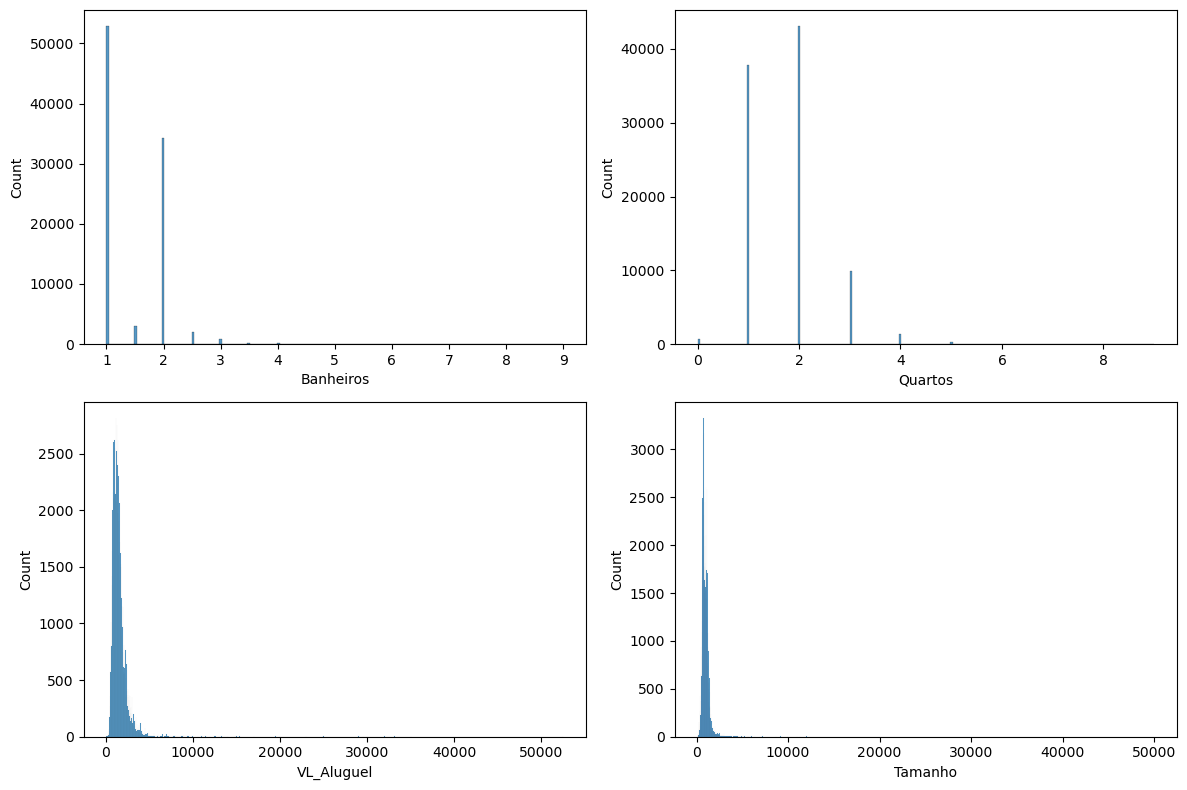

In [68]:
#Podemos observar nos histogramas abaixo que as variáveis númericas não representam uma distribuição normal

plt.rcParams["figure.figsize"] = [12.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2) #2 linhas e 2 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.histplot(data = df_original, x=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()

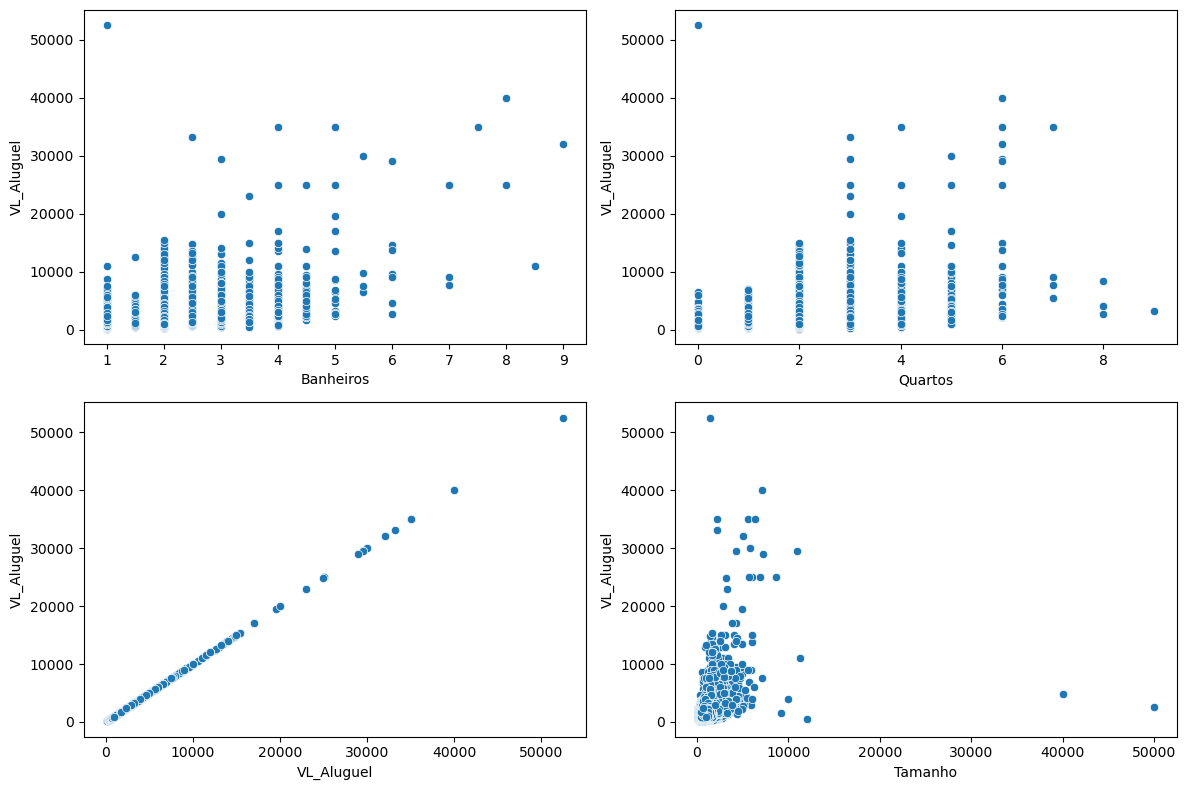

In [71]:
# Nos scatterplots abaixo observamos que o nível de correlação de cada variável não é forte nem positivamente e nem 
# negativamente, porém iremos fazer um tratamento para melhorar isso.

plt.rcParams["figure.figsize"] = [12.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2) #2 linhas e 2 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:    
    sns.scatterplot(x=i, y='VL_Aluguel', data=df_original, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()

In [74]:
#carregar variaveis categoricas para OneHotEncoding e OrdinalEncoding
#Não vamos incluir a variavel target
variaveis_categoricas = []
for i in df_original.columns[0:22].tolist():
        if df_original.dtypes[i] == 'object' or df_original.dtypes[i] == 'category':                        
            variaveis_categoricas.append(i) 

In [76]:
# Visualizando as variaveis categoricas
variaveis_categoricas

['Categoria',
 'Titulo',
 'Descricao',
 'Comodidades',
 'Moeda',
 'Taxa',
 'Foto_Anuncio',
 'Permite_Pets',
 'VL_Aluguel_Exibido',
 'Tipo_Aluguel',
 'Endereco',
 'Cidade',
 'Estado',
 'Imobiliaria']

In [78]:
# Algumas dessa variáveis não precisamos analisar pois iremos descarta-las, então podemos retirar da nossa lista
variaveis_categoricas = ['Permite_Pets','Estado','Categoria','Taxa','Foto_Anuncio','Tipo_Aluguel','Imobiliaria']
variaveis_categoricas

['Permite_Pets',
 'Estado',
 'Categoria',
 'Taxa',
 'Foto_Anuncio',
 'Tipo_Aluguel',
 'Imobiliaria']

In [80]:
# Quantidade de variaveis categóricas
len(variaveis_categoricas)

7

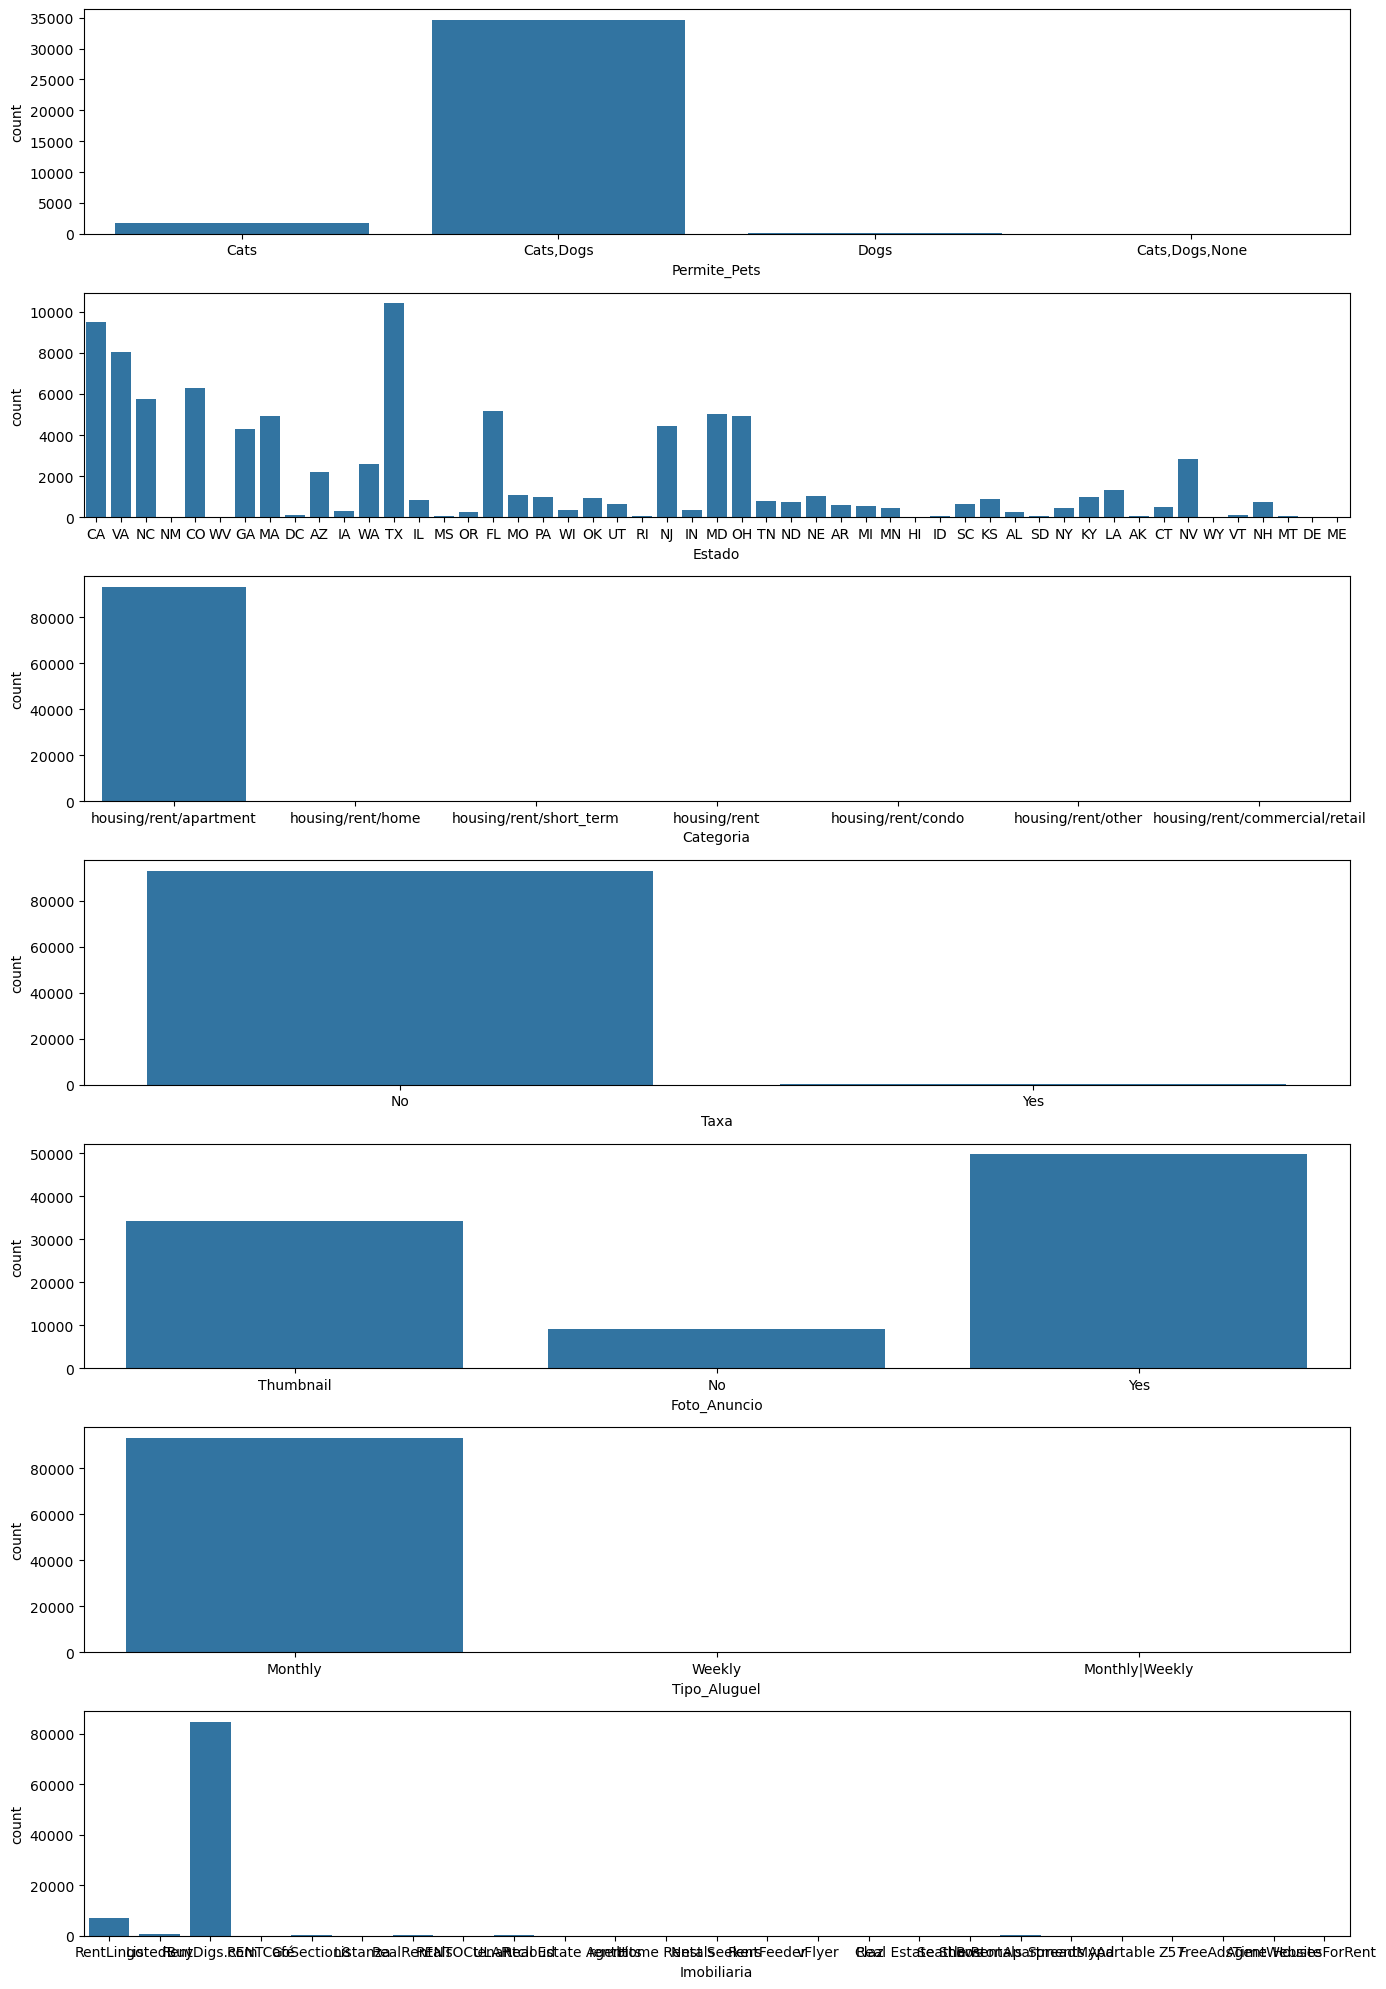

In [82]:
plt.rcParams["figure.figsize"] = [14.00, 20.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(7, 1) #8 linhas e 1 colunas

linha = 0
coluna = 0
for i in variaveis_categoricas:    
    sns.countplot(x = i, data = df_original, ax=axes[linha])    
    linha += 1    
    

plt.show()

In [84]:
# Como o gráfico para avaliar a Imobiliaria não ficou bom para ser visualizado dessa forma, vamos analisar de outro jeito...
df_imobiliaria = df_original.groupby(['Imobiliaria']).size().reset_index()
df_imobiliaria.columns = ['Imobiliaria','Qtd_Imoveis'].copy()
df_imobiliaria = df_imobiliaria.sort_values(by = ['Qtd_Imoveis'], ascending = False)
df_imobiliaria

Imobiliaria  Qtd_Imoveis
16       RentDigs.com        84702
18          RentLingo         6924
9           ListedBuy          571
5          GoSection8          437
15        RealRentals          268
23        tenantcloud          124
2    BostonApartments           94
11           RENTCafé           41
8            Listanza           29
20         SpreadMyAd           22
12         RENTOCULAR           18
17         RentFeeder           12
3                Claz            8
6        Home Rentals            8
22           rentbits            5
24             vFlyer            5
10       Nest Seekers            5
19    Seattle Rentals            2
14  Real Estate Shows            1
13  Real Estate Agent            1
1           Apartable            1
21                Z57            1
7       HousesForRent            1
4         FreeAdsTime            1
0        AgentWebsite            1

In [86]:
# Vamos também analisar o gráfico de estado de outra forma...
df_estado = df_original.groupby(['Estado']).size().reset_index()
df_estado.columns = ['Estado','Qtd_Imoveis'].copy()
df_estado = df_estado.sort_values(by = ['Qtd_Imoveis'], ascending = False)
df_estado

Estado  Qtd_Imoveis
43     TX        10403
4      CA         9473
45     VA         8036
5      CO         6290
27     NC         5763
9      FL         5194
20     MD         5043
19     MA         4917
35     OH         4905
31     NJ         4445
10     GA         4290
33     NV         2815
47     WA         2590
3      AZ         2214
18     LA         1345
24     MO         1081
29     NE         1020
17     KY          995
38     PA          984
36     OK          934
16     KS          903
14     IL          852
42     TN          813
28     ND          743
30     NH          735
40     SC          644
44     UT          638
2      AR          598
22     MI          545
6      CT          509
34     NY          475
23     MN          444
15     IN          376
48     WI          375
12     IA          301
1      AL          271
37     OR          248
46     VT          125
7      DC           93
39     RI           90
26     MT           87
13     ID           77
41     SD           77
25     MS           56
0      AK           53
21     ME           32
11     HI           29
32     NM           24
50     WY           14
49     WV            9
8      DE            7

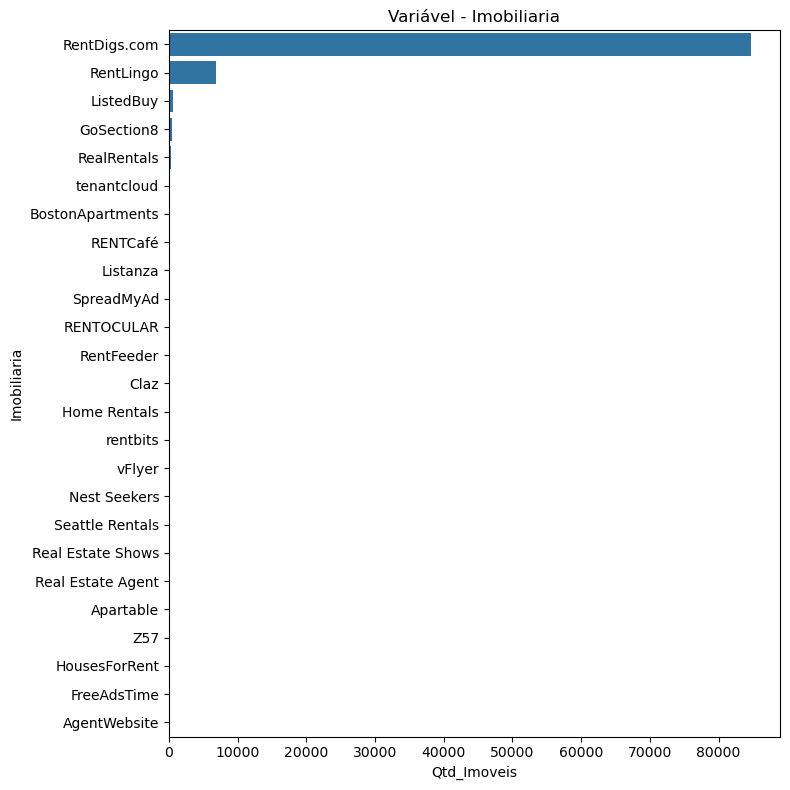

In [88]:
# Como o gráfico para avaliar a Imobiliaria não ficou bom para ser visualizado dessa forma, vamos analisar de outro jeito...

# Exibindo a importancia de cada variavel no modelo preditivo
plt.rcParams["figure.figsize"] = [8.00, 8.00]
plt.rcParams["figure.autolayout"] = True

sns.barplot(x = df_imobiliaria['Qtd_Imoveis'], y=df_imobiliaria['Imobiliaria'], orient='h').set_title('Variável - Imobiliaria')
plt.show()

In [90]:
# Vamos analisar os imóveis distribuidos através de um mapa com marcadores

df_localizacao = df_original.copy()
df_localizacao = df_localizacao.dropna(subset=['Latitude','Longitude'])
df_localizacao['lat_lon'] = df_localizacao['Latitude'].astype(str) + ' - ' + df_localizacao['Longitude'].astype(str)
df_localizacao = df_localizacao.groupby(['Latitude','Longitude','lat_lon']).size().reset_index()
df_localizacao.columns = ['Latitude','Longitude','Lat_Lon','Qtd_Imoveis']
df_localizacao = df_localizacao.loc[(df_localizacao['Qtd_Imoveis'] > 10)]


latitude = df_localizacao.Latitude.values
longitude = df_localizacao.Longitude.values

mapa = folium.Map(location = [37.090240, -95.712891], zoom_start = 5)

for lat, lon in zip(latitude,longitude):
    folium.Marker(location=[lat,lon]).add_to(mapa)

mapa

### 4º Passo - Pré-Processamento e Tratamento dos Dados
<p> Vamos realizar nessa etapa a preparação necessária nos dados para podermos criar nosso modelo de Machine Learning
<p>    
<p>1 - Variáveis que podem ser retiradas do dataset para criação do modelo
<br>&nbsp;&nbsp;&nbsp;  - ID_Imovel: Refere-se a identificador do imóvel
<br>&nbsp;&nbsp;&nbsp;	- Titulo: Refere-se ao titulo do anuncio
<br>&nbsp;&nbsp;&nbsp;	- Descricao: Refere-se a descrição do anuncio
<br>&nbsp;&nbsp;&nbsp;	- Moeda: Temos somente 1 valor nessa variável
<br>&nbsp;&nbsp;&nbsp;	- Foto_Anuncio: Iremos desconsiderar pois não será necessário
<br>&nbsp;&nbsp;&nbsp;	- Categoria: As categoias são praticamente identicas
<br>&nbsp;&nbsp;&nbsp;	- Tipo_Aluguel: Iremos considerar valores até 10.000
<br>&nbsp;&nbsp;&nbsp;	- VL_Aluguel_Exibido: Refere ao rótulo exibido como valor do aluguel, porém é a mesma informação que VL_Aluguel
<br>&nbsp;&nbsp;&nbsp;	- Endereço: Endereço do imóvel
<br>&nbsp;&nbsp;&nbsp;	- Cidade: Cidade do imóvel
<br>&nbsp;&nbsp;&nbsp;	- Latitude: Latitude do Imóvel
<br>&nbsp;&nbsp;&nbsp;	- Longitude: Longitude do Imóvel    
    
<p>2 - Tratar valores nulos
<br>&nbsp;&nbsp;&nbsp;	- Comodidades - Vamos considerar que possui como comodidade Parking - Estacionamento 
<br>&nbsp;&nbsp;&nbsp;	- Banheiros - Inserir a média de banheiros
<br>&nbsp;&nbsp;&nbsp;	- Quartos - Inserir a média de quartos
<br>&nbsp;&nbsp;&nbsp;	- Permite_Pets - Inserir a informação que NÃO permite
<br>&nbsp;&nbsp;&nbsp;	- Estado - Nesse caso são poucos valores nulos (302) iremos fazer um Drop(Excluir)
<br>&nbsp;&nbsp;&nbsp;	- VL_Aluguel - Inserir a mediana do valor de aluguel
<br>&nbsp;&nbsp;&nbsp;	- VL_Aluguel_Exibido - Essa variável será retirada
<br>&nbsp;&nbsp;&nbsp;	- Endereco - Essa variável será retirada
<br>&nbsp;&nbsp;&nbsp;	- Cidade - Essa variável será retirada
<br>&nbsp;&nbsp;&nbsp;	- Latitude - Essa variável será retirada
<br>&nbsp;&nbsp;&nbsp;	- Longitude - Essa variável será retirada    

<p>3 - Exclusão de Outliers
<br>&nbsp;&nbsp;&nbsp;	- VL_Aluguel - Vamos excluir casos que possuem valor de aluguel superior a 10k
<br>&nbsp;&nbsp;&nbsp;	- Tamanho - Vamos excluir casos que possuem Tamanho superior a 10k
    
<p>4 - Engenharia de Atributos
<br>&nbsp;&nbsp;&nbsp;	- Comodidades - Vamos separar as comidadades e criar uma variavel para cada comodidade    
<br>&nbsp;&nbsp;&nbsp;	- Categoria - Vamos separar as categorias e criar uma variavel para cada categoria
<br>&nbsp;&nbsp;&nbsp;	- Inclusao - Vamos criar uma variável com a data da inclusão,depois criar uma variavel de Qtde_Dias que o anuncio foi postado e em seguida excluir a variavel inclusao
<br>&nbsp;&nbsp;&nbsp;	- Excluir as variaveis Categoria, Comodidades e Inclusao, pois já fizemos a engenharia de atributos...
    
<p>5 - Ajuste de dados
<br>&nbsp;&nbsp;&nbsp;	- Permite_Pets - Transformar em Sim/Nao

<p>5 - Vamos fazer o OneHotEncoder das variáveis do tipo object (Categoricas Nominais)    
<p>6 - Separar as variaveis preditoras da variável alvo    
<p>7 - Separar os dados em Dados de Treino e Dados de Teste
<p>8 -Vamos realizar a padronizacao dos dados        

In [94]:
# Vamos fazer uma cópia do nosso DF_Original
df_dados = df_original.copy()
df_dados.head(2)

ID_Imovel               Categoria                       Titulo  \
0  5668640009  housing/rent/apartment   One BR 507 & 509 Esplanade   
1  5668639818  housing/rent/apartment  Three BR 146 Lochview Drive   

                                           Descricao Comodidades  Banheiros  \
0  This unit is located at 507 & 509 Esplanade, R...         NaN        1.0   
1  This unit is located at 146 Lochview Drive, Ne...         NaN        1.5   

   Quartos Moeda Taxa Foto_Anuncio Permite_Pets  VL_Aluguel  \
0      1.0   USD   No    Thumbnail         Cats      2195.0   
1      3.0   USD   No    Thumbnail    Cats,Dogs      1250.0   

  VL_Aluguel_Exibido Tipo_Aluguel  Tamanho            Endereco         Cidade  \
0             $2,195      Monthly    542.0  507  509 Esplanade  Redondo Beach   
1             $1,250      Monthly   1500.0     146 Lochview Dr   Newport News   

  Estado  Latitude  Longitude Imobiliaria      Inclusao  
0     CA   33.8520  -118.3759   RentLingo  1.577360e+09  
1     VA   37.0867   -76.4941   RentLingo  1.577360e+09

In [96]:
# Visualizando as colunas
df_dados.columns

Index(['ID_Imovel', 'Categoria', 'Titulo', 'Descricao', 'Comodidades',
       'Banheiros', 'Quartos', 'Moeda', 'Taxa', 'Foto_Anuncio', 'Permite_Pets',
       'VL_Aluguel', 'VL_Aluguel_Exibido', 'Tipo_Aluguel', 'Tamanho',
       'Endereco', 'Cidade', 'Estado', 'Latitude', 'Longitude', 'Imobiliaria',
       'Inclusao'],
      dtype='object')

In [98]:
# Vamos desconsiderar as colunas que podemos excluir
# A coluna Latitude e Longitude NÃO iremos desconsiderar por enquanto
columns = ['Categoria', 'Comodidades','Banheiros', 'Quartos', 'Taxa', 'Permite_Pets','Tamanho',
           'Estado', 'Imobiliaria','Inclusao','VL_Aluguel','Latitude','Longitude']    

df_dados = pd.DataFrame(df_dados, columns=columns)
df_dados.head()

Categoria Comodidades  Banheiros  Quartos Taxa Permite_Pets  \
0  housing/rent/apartment         NaN        1.0      1.0   No         Cats   
1  housing/rent/apartment         NaN        1.5      3.0   No    Cats,Dogs   
2  housing/rent/apartment         NaN        2.0      3.0   No          NaN   
3  housing/rent/apartment         NaN        1.0      2.0   No    Cats,Dogs   
4  housing/rent/apartment         NaN        1.0      1.0   No    Cats,Dogs   

   Tamanho Estado Imobiliaria      Inclusao  VL_Aluguel  Latitude  Longitude  
0    542.0     CA   RentLingo  1.577360e+09      2195.0   33.8520  -118.3759  
1   1500.0     VA   RentLingo  1.577360e+09      1250.0   37.0867   -76.4941  
2   1650.0     NC   RentLingo  1.577360e+09      1395.0   35.8230   -78.6438  
3    820.0     CA   RentLingo  1.577360e+09      1600.0   38.3622  -121.9712  
4    624.0     NM   RentLingo  1.577360e+09       975.0   35.1038  -106.6110

In [100]:
# Tratando valores nulos

df_dados = df_dados.dropna(subset=['Estado'])
df_dados = df_dados.dropna(subset=['Latitude'])
df_dados = df_dados.dropna(subset=['Longitude'])

df_dados['Comodidades'] = df_dados['Comodidades'].fillna('Parking')
df_dados['Permite_Pets'] = df_dados['Permite_Pets'].fillna('Nao')
df_dados['Banheiros'] = df_dados['Banheiros'].fillna(df_dados['Banheiros'].mean())
df_dados['Quartos'] = df_dados['Quartos'].fillna(df_dados['Quartos'].mean())

df_dados['VL_Aluguel'] = df_dados['VL_Aluguel'].fillna(df_dados['VL_Aluguel'].median())


df_dados.isnull().sum()

Categoria       0
Comodidades     0
Banheiros       0
Quartos         0
Taxa            0
Permite_Pets    0
Tamanho         0
Estado          0
Imobiliaria     0
Inclusao        0
VL_Aluguel      0
Latitude        0
Longitude       0
dtype: int64

In [102]:
# Tratando valores de Aluguel e Tamanho
df_dados = df_dados[(df_dados['VL_Aluguel'] <=10000)]
df_dados = df_dados[(df_dados['Tamanho'] <=10000)]
print('Valor máximo do aluguel: ', df_dados['VL_Aluguel'].max())
print('Valor máximo do tamanho: ', df_dados['Tamanho'].max())

Valor máximo do aluguel:  10000.0
Valor máximo do tamanho:  9998.0


In [104]:
# Vamos avaliar novamente a quantidade de imóveis disponíveis por imobiliária
df_imobiliaria = df_dados.groupby(['Imobiliaria']).size().reset_index()
df_imobiliaria.columns = ['Imobiliaria','Qtd_Imoveis'].copy()
df_imobiliaria = df_imobiliaria.sort_values(by = ['Qtd_Imoveis'], ascending = False)
df_imobiliaria

Imobiliaria  Qtd_Imoveis
16       RentDigs.com        84428
18          RentLingo         6843
9           ListedBuy          566
5          GoSection8          437
15        RealRentals          265
23        tenantcloud          124
2    BostonApartments           94
11           RENTCafé           41
8            Listanza           27
12         RENTOCULAR           18
20         SpreadMyAd           17
17         RentFeeder           12
3                Claz            8
6        Home Rentals            8
22           rentbits            5
24             vFlyer            5
10       Nest Seekers            4
19    Seattle Rentals            2
14  Real Estate Shows            1
13  Real Estate Agent            1
1           Apartable            1
21                Z57            1
7       HousesForRent            1
4         FreeAdsTime            1
0        AgentWebsite            1

In [106]:
# Vamos avaliar a quantidade de imóveis por estado
df_estado_qtd = df_dados.groupby(['Estado']).size().reset_index()
df_estado_qtd.columns = ['Estado','Qtd_Imoveis'].copy()
df_estado_qtd = df_estado_qtd.sort_values(by = ['Qtd_Imoveis'], ascending = False)
df_estado_qtd

Estado  Qtd_Imoveis
43     TX        10403
4      CA         9422
45     VA         8036
5      CO         6289
27     NC         5763
9      FL         5186
20     MD         5042
19     MA         4917
35     OH         4904
31     NJ         4445
10     GA         4290
33     NV         2815
47     WA         2590
3      AZ         2214
18     LA         1345
24     MO         1081
29     NE         1020
17     KY          995
38     PA          984
36     OK          934
16     KS          903
14     IL          851
42     TN          813
28     ND          743
30     NH          734
40     SC          644
44     UT          638
2      AR          598
22     MI          545
6      CT          509
34     NY          470
23     MN          444
15     IN          376
48     WI          375
12     IA          301
1      AL          271
37     OR          248
46     VT          125
7      DC           93
39     RI           90
26     MT           87
13     ID           77
41     SD           77
25     MS           56
0      AK           53
21     ME           32
11     HI           29
32     NM           24
50     WY           14
49     WV            9
8      DE            7

In [108]:
# Vamos avaliar o valor médio do aluguel por estado
df_estado_vl = df_dados.groupby('Estado').agg({'VL_Aluguel' : 'mean'}).reset_index()
df_estado_vl = df_estado_vl.sort_values(by = ['VL_Aluguel'], ascending = False)
df_estado_vl

Estado   VL_Aluguel
11     HI  2743.965517
34     NY  2399.440426
4      CA  2379.704097
19     MA  2179.755339
7      DC  2112.139785
39     RI  2066.822222
31     NJ  2037.914511
47     WA  1826.890734
20     MD  1643.372868
9      FL  1553.174315
5      CO  1549.600095
37     OR  1484.758065
45     VA  1470.366227
14     IL  1453.985899
30     NH  1438.123978
46     VT  1415.080000
23     MN  1374.002252
10     GA  1368.128904
44     UT  1274.840125
48     WI  1266.744000
6      CT  1266.229862
38     PA  1256.690041
21     ME  1247.656250
43     TX  1226.322215
22     MI  1176.398165
33     NV  1173.402131
42     TN  1162.670357
8      DE  1154.857143
27     NC  1149.924518
40     SC  1138.335404
13     ID  1131.623377
3      AZ  1121.771454
26     MT  1118.344828
35     OH  1110.838295
15     IN  1035.750000
24     MO  1033.334875
0      AK  1029.226415
18     LA  1026.063941
36     OK  1015.319058
17     KY   989.283407
1      AL   969.848708
28     ND   945.471063
12     IA   935.627907
29     NE   933.163725
16     KS   919.318937
41     SD   901.077922
2      AR   874.367893
25     MS   863.892857
32     NM   844.041667
49     WV   815.111111
50     WY   776.285714

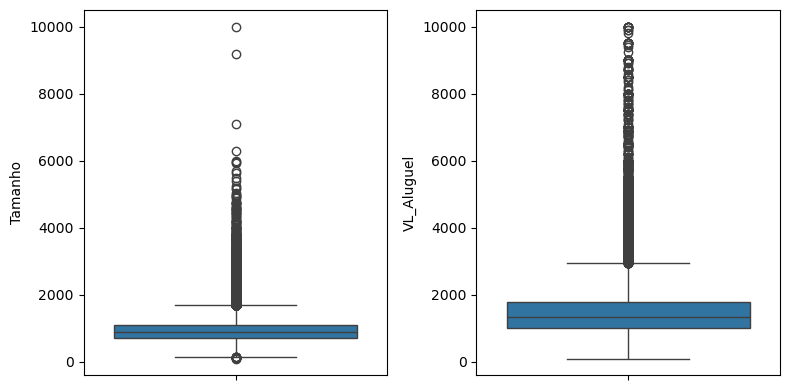

In [110]:
# Se olharmos agora nosso BoxPlot observamos uma grande diferença...

variaveis_numericas = ['Tamanho','VL_Aluguel']

plt.rcParams["figure.figsize"] = [8.00, 4.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2) #1 linhas e 2 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_dados, y=i, ax=axes[coluna])
    coluna +=1    

plt.show()

In [112]:
# Vamos relembrar como está nossa variável Comodidades
df_dados.head(100)

Categoria                                        Comodidades  \
0   housing/rent/apartment                                            Parking   
1   housing/rent/apartment                                            Parking   
2   housing/rent/apartment                                            Parking   
3   housing/rent/apartment                                            Parking   
4   housing/rent/apartment                                            Parking   
5   housing/rent/apartment                                            Parking   
6   housing/rent/apartment                                            Parking   
7   housing/rent/apartment                                            Parking   
8   housing/rent/apartment                                            Parking   
9   housing/rent/apartment                                            Parking   
10  housing/rent/apartment                                            Parking   
11  housing/rent/apartment                                            Parking   
12  housing/rent/apartment                                            Parking   
13  housing/rent/apartment                                            Parking   
14  housing/rent/apartment                                            Parking   
15  housing/rent/apartment                                            Parking   
16  housing/rent/apartment                                            Parking   
17  housing/rent/apartment                                            Parking   
18  housing/rent/apartment                                            Parking   
19  housing/rent/apartment                                            Parking   
20  housing/rent/apartment                                            Parking   
21  housing/rent/apartment     Fireplace,Gym,Parking,Pool,Storage,Wood Floors   
22  housing/rent/apartment                                         Gated,Pool   
23  housing/rent/apartment                            Dishwasher,Parking,Pool   
24  housing/rent/apartment                            Dishwasher,Parking,Pool   
25  housing/rent/apartment                                           Gym,Pool   
26  housing/rent/apartment                           Clubhouse,Fireplace,Pool   
27  housing/rent/apartment                            Dishwasher,Parking,Pool   
28  housing/rent/apartment                                            Parking   
29  housing/rent/apartment                            Dishwasher,Parking,Pool   
30  housing/rent/apartment                                            Parking   
31  housing/rent/apartment                                            Parking   
32  housing/rent/apartment                            Dishwasher,Parking,Pool   
33  housing/rent/apartment                                            Parking   
34  housing/rent/apartment               Dishwasher,Parking,Pool,Refrigerator   
35  housing/rent/apartment                                            Parking   
36  housing/rent/apartment                                            Parking   
37  housing/rent/apartment      Dishwasher,Elevator,Parking,Pool,Refrigerator   
38  housing/rent/apartment                    Dishwasher,Parking,Refrigerator   
39  housing/rent/apartment                                            Parking   
40  housing/rent/apartment                                            Parking   
41  housing/rent/apartment                                       Refrigerator   
42  housing/rent/apartment                            Dishwasher,Refrigerator   
43  housing/rent/apartment                                            Parking   
44  housing/rent/apartment  Dishwasher,Parking,Patio/Deck,Refrigerator,Sto...   
45  housing/rent/apartment  Cable or Satellite,Dishwasher,Elevator,Firepla...   
46  housing/rent/apartment                            Dishwasher,Parking,Pool   
47  housing/rent/apartment  Dishwasher,Garbage Disposal,Patio/Deck,Refrige...   
48  housing/rent/apartment                      

In [114]:
# Engenharia de Atributos - Variavel Comodidade

lista = []
for i in df_dados['Comodidades']:
    try:
        print(i.split(','))
        teste = i.split(',')
        for w in teste:
            lista.append(w)
    except:
        pass 

['Parking']
['Parking']
['Parking']
['Parking']
['Parking']
['Parking']
['Parking']
['Parking']
['Parking']
['Parking']
['Parking']
['Parking']
['Parking']
['Parking']
['Parking']
['Parking']
['Parking']
['Parking']
['Parking']
['Parking']
['Parking']
['Fireplace', 'Gym', 'Parking', 'Pool', 'Storage', 'Wood Floors']
['Gated', 'Pool']
['Dishwasher', 'Parking', 'Pool']
['Dishwasher', 'Parking', 'Pool']
['Gym', 'Pool']
['Clubhouse', 'Fireplace', 'Pool']
['Dishwasher', 'Parking', 'Pool']
['Parking']
['Dishwasher', 'Parking', 'Pool']
['Parking']
['Parking']
['Dishwasher', 'Parking', 'Pool']
['Parking']
['Dishwasher', 'Parking', 'Pool', 'Refrigerator']
['Parking']
['Parking']
['Dishwasher', 'Elevator', 'Parking', 'Pool', 'Refrigerator']
['Dishwasher', 'Parking', 'Refrigerator']
['Parking']
['Parking']
['Refrigerator']
['Dishwasher', 'Refrigerator']
['Parking']
['Dishwasher', 'Parking', 'Patio/Deck', 'Refrigerator', 'Storage']
['Cable or Satellite', 'Dishwasher', 'Elevator', 'Fireplace', 'Gar

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [116]:
# Verificando nossa lista de comodidades
lista

['Parking',
 'Parking',
 'Parking',
 'Parking',
 'Parking',
 'Parking',
 'Parking',
 'Parking',
 'Parking',
 'Parking',
 'Parking',
 'Parking',
 'Parking',
 'Parking',
 'Parking',
 'Parking',
 'Parking',
 'Parking',
 'Parking',
 'Parking',
 'Parking',
 'Fireplace',
 'Gym',
 'Parking',
 'Pool',
 'Storage',
 'Wood Floors',
 'Gated',
 'Pool',
 'Dishwasher',
 'Parking',
 'Pool',
 'Dishwasher',
 'Parking',
 'Pool',
 'Gym',
 'Pool',
 'Clubhouse',
 'Fireplace',
 'Pool',
 'Dishwasher',
 'Parking',
 'Pool',
 'Parking',
 'Dishwasher',
 'Parking',
 'Pool',
 'Parking',
 'Parking',
 'Dishwasher',
 'Parking',
 'Pool',
 'Parking',
 'Dishwasher',
 'Parking',
 'Pool',
 'Refrigerator',
 'Parking',
 'Parking',
 'Dishwasher',
 'Elevator',
 'Parking',
 'Pool',
 'Refrigerator',
 'Dishwasher',
 'Parking',
 'Refrigerator',
 'Parking',
 'Parking',
 'Refrigerator',
 'Dishwasher',
 'Refrigerator',
 'Parking',
 'Dishwasher',
 'Parking',
 'Patio/Deck',
 'Refrigerator',
 'Storage',
 'Cable or Satellite',
 'Dishwash

In [118]:
# Criando um DataFrame com a lista de comodidades
df_comodidades = pd.DataFrame(lista, columns = ['Comodidade'])
df_comodidades.head(10)

Comodidade
0    Parking
1    Parking
2    Parking
3    Parking
4    Parking
5    Parking
6    Parking
7    Parking
8    Parking
9    Parking

In [120]:
# Visualizando o agrupamento de Comodidade
df_comodidades.groupby(['Comodidade']).size().sort_values(ascending = False)

Comodidade
Parking               56214
Pool                  40208
Gym                   34275
Patio/Deck            24520
Washer Dryer          23711
Storage               19932
Clubhouse             17633
Dishwasher            15491
AC                    14514
Refrigerator          13960
Fireplace             13811
Cable or Satellite    11605
Playground            10377
Internet Access       10184
Wood Floors            8130
Gated                  7881
Tennis                 7799
TV                     4116
Elevator               4015
Basketball             3893
Hot Tub                3696
Garbage Disposal       3656
View                   1974
Alarm                   317
Luxury                  199
Doorman                 185
Golf                     27
dtype: int64

In [122]:
# Vamos criar um dicionario para deixar o nome das informações de comodidades em Portugues
dicionario = {'Parking':'Estacionamento',
            'Pool':'Piscina',                                
            'Gym':'Academia',                                 
            'Patio/Deck':'Terraco',                          
            'Washer Dryer':'Lavadora_Secadora',                        
            'Storage':'Armazenamento',                             
            'Clubhouse':'Clube',                           
            'Dishwasher':'Lava_Louca',                          
            'AC':'AR_Condicionado',                                  
            'Refrigerator':'Refrigerador',                        
            'Fireplace':'Lareira',                           
            'Cable or Satellite':'TV_Cabo',                  
            'Playground':'Parquinho',                          
            'Internet Access':'Acesso_Internet',                     
            'Wood Floors':'Piso_Madeira',                         
            'Gated':'Portaria',                               
            'Tennis':'Quadra_Tenis',                              
            'TV':'TV',                                  
            'Elevator':'Elevador',                            
            'Basketball':'Quadra_Basket',                          
            'Hot Tub':'Hidromassagem',                             
            'Garbage Disposal':'Coleta_Lixo',                    
            'View':'Cameras',                                
            'Alarm':'Alarme',                               
            'Doorman':'Porteiro',                             
            'Luxury':'Luxo',                              
            'Golf':'Campo_Golfe'} 
dicionario

{'Parking': 'Estacionamento',
 'Pool': 'Piscina',
 'Gym': 'Academia',
 'Patio/Deck': 'Terraco',
 'Washer Dryer': 'Lavadora_Secadora',
 'Storage': 'Armazenamento',
 'Clubhouse': 'Clube',
 'Dishwasher': 'Lava_Louca',
 'AC': 'AR_Condicionado',
 'Refrigerator': 'Refrigerador',
 'Fireplace': 'Lareira',
 'Cable or Satellite': 'TV_Cabo',
 'Playground': 'Parquinho',
 'Internet Access': 'Acesso_Internet',
 'Wood Floors': 'Piso_Madeira',
 'Gated': 'Portaria',
 'Tennis': 'Quadra_Tenis',
 'TV': 'TV',
 'Elevator': 'Elevador',
 'Basketball': 'Quadra_Basket',
 'Hot Tub': 'Hidromassagem',
 'Garbage Disposal': 'Coleta_Lixo',
 'View': 'Cameras',
 'Alarm': 'Alarme',
 'Doorman': 'Porteiro',
 'Luxury': 'Luxo',
 'Golf': 'Campo_Golfe'}

In [124]:
# Agora faremos um loop For para incluir as variaveis em nosso DataFrame
for index, row in df_dados.iterrows():    
    for chave, valor in dicionario.items():
        try:            
            if chave in row['Comodidades']:
                df_dados.at[index, valor] = 'Sim'
            else:
                df_dados.at[index, valor] = 'Nao'
        except:
            pass

In [126]:
# Visualizando nosso DataFrame com as novas colunas
df_dados.head()

Categoria Comodidades  Banheiros  Quartos Taxa Permite_Pets  \
0  housing/rent/apartment     Parking        1.0      1.0   No         Cats   
1  housing/rent/apartment     Parking        1.5      3.0   No    Cats,Dogs   
2  housing/rent/apartment     Parking        2.0      3.0   No          Nao   
3  housing/rent/apartment     Parking        1.0      2.0   No    Cats,Dogs   
4  housing/rent/apartment     Parking        1.0      1.0   No    Cats,Dogs   

   Tamanho Estado Imobiliaria      Inclusao  VL_Aluguel  Latitude  Longitude  \
0    542.0     CA   RentLingo  1.577360e+09      2195.0   33.8520  -118.3759   
1   1500.0     VA   RentLingo  1.577360e+09      1250.0   37.0867   -76.4941   
2   1650.0     NC   RentLingo  1.577360e+09      1395.0   35.8230   -78.6438   
3    820.0     CA   RentLingo  1.577360e+09      1600.0   38.3622  -121.9712   
4    624.0     NM   RentLingo  1.577360e+09       975.0   35.1038  -106.6110   

  Estacionamento Piscina Academia Terraco Lavadora_Secadora Armazenamento  \
0            Sim     Nao      Nao     Nao               Nao           Nao   
1            Sim     Nao      Nao     Nao               Nao           Nao   
2            Sim     Nao      Nao     Nao               Nao           Nao   
3            Sim     Nao      Nao     Nao               Nao           Nao   
4            Sim     Nao      Nao     Nao               Nao           Nao   

  Clube Lava_Louca AR_Condicionado Refrigerador Lareira TV_Cabo Parquinho  \
0   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
1   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
2   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
3   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
4   Nao        Nao             Nao          Nao     Nao     Nao       Nao   

  Acesso_Internet Piso_Madeira Portaria Quadra_Tenis   TV Elevador  \
0             Nao          Nao      Nao          Nao  Nao      Nao   
1             Nao          Nao      Nao          Nao  Nao      Nao   
2             Nao          Nao      Nao          Nao  Nao      Nao   
3             Nao          Nao      Nao          Nao  Nao      Nao   
4             Nao          Nao      Nao          Nao  Nao      Nao   

  Quadra_Basket Hidromassagem Coleta_Lixo Cameras Alarme Porteiro Luxo  \
0           Nao           Nao         Nao     Nao    Nao      Nao  Nao   
1           Nao           Nao         Nao     Nao    Nao      Nao  Nao   
2           Nao           Nao         Nao     Nao    Nao      Nao  Nao   
3           Nao           Nao         Nao     Nao    Nao      Nao  Nao   
4           Nao           Nao         Nao     Nao    Nao      Nao  Nao   

  Campo_Golfe  
0         Nao  
1         Nao  
2         Nao  
3         Nao  
4         Nao

In [128]:
# Engenharia de Atributos - Variavel Categoria - Mesmo passo a passo que fizemos para Comodidades

lista = []
for i in df_dados['Categoria']:
    try:        
        categoria = i.split('/')
        for w in categoria:
            lista.append(w)
    except:
        pass
    
# Cria o DataFrame    
df_categoria = pd.DataFrame(lista, columns = ['Categoria'])   

# Visualizando o agrupamento de Categoria
#df_categoria.groupby(['Categoria']).size().sort_values(ascending = False)

# Criando o dicionario
dicionario = {'housing':'Habitacao',
            'rent':'Aluguel',                                
            'apartment':'Apartamento',                                 
            'commercial':'Outros',                          
            'retail':'Outros',                        
            'home':'Outros',                             
            'short_term':'Outros',                           
            'condo':'Outros',                                                                        
            'other':'Outros'} 

# Agora faremos um loop For para incluir as variaveis em nosso DataFrame
for index, row in df_dados.iterrows():    
    for chave, valor in dicionario.items():
        try:            
            if chave in row['Categoria']:
                df_dados.at[index, valor] = 'Sim'
            else:
                df_dados.at[index, valor] = 'Nao'
        except:
            pass
        
# Visualizando as novas colunas
df_dados.head()

Categoria Comodidades  Banheiros  Quartos Taxa Permite_Pets  \
0  housing/rent/apartment     Parking        1.0      1.0   No         Cats   
1  housing/rent/apartment     Parking        1.5      3.0   No    Cats,Dogs   
2  housing/rent/apartment     Parking        2.0      3.0   No          Nao   
3  housing/rent/apartment     Parking        1.0      2.0   No    Cats,Dogs   
4  housing/rent/apartment     Parking        1.0      1.0   No    Cats,Dogs   

   Tamanho Estado Imobiliaria      Inclusao  VL_Aluguel  Latitude  Longitude  \
0    542.0     CA   RentLingo  1.577360e+09      2195.0   33.8520  -118.3759   
1   1500.0     VA   RentLingo  1.577360e+09      1250.0   37.0867   -76.4941   
2   1650.0     NC   RentLingo  1.577360e+09      1395.0   35.8230   -78.6438   
3    820.0     CA   RentLingo  1.577360e+09      1600.0   38.3622  -121.9712   
4    624.0     NM   RentLingo  1.577360e+09       975.0   35.1038  -106.6110   

  Estacionamento Piscina Academia Terraco Lavadora_Secadora Armazenamento  \
0            Sim     Nao      Nao     Nao               Nao           Nao   
1            Sim     Nao      Nao     Nao               Nao           Nao   
2            Sim     Nao      Nao     Nao               Nao           Nao   
3            Sim     Nao      Nao     Nao               Nao           Nao   
4            Sim     Nao      Nao     Nao               Nao           Nao   

  Clube Lava_Louca AR_Condicionado Refrigerador Lareira TV_Cabo Parquinho  \
0   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
1   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
2   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
3   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
4   Nao        Nao             Nao          Nao     Nao     Nao       Nao   

  Acesso_Internet Piso_Madeira Portaria Quadra_Tenis   TV Elevador  \
0             Nao          Nao      Nao          Nao  Nao      Nao   
1             Nao          Nao      Nao          Nao  Nao      Nao   
2             Nao          Nao      Nao          Nao  Nao      Nao   
3             Nao          Nao      Nao          Nao  Nao      Nao   
4             Nao          Nao      Nao          Nao  Nao      Nao   

  Quadra_Basket Hidromassagem Coleta_Lixo Cameras Alarme Porteiro Luxo  \
0           Nao           Nao         Nao     Nao    Nao      Nao  Nao   
1           Nao           Nao         Nao     Nao    Nao      Nao  Nao   
2           Nao           Nao         Nao     Nao    Nao      Nao  Nao   
3           Nao           Nao         Nao     Nao    Nao      Nao  Nao   
4           Nao           Nao         Nao     Nao    Nao      Nao  Nao   

  Campo_Golfe Habitacao Aluguel Apartamento Outros  
0         Nao       Sim     Sim         Sim    Nao  
1         Nao       Sim     Sim         Sim    Nao  
2         Nao       Sim     Sim         Sim    Nao  
3         Nao       Sim     Sim         Sim    Nao  
4         Nao       Sim     Sim         Sim    Nao

In [130]:
# Criando uma variavel com a Data_Inclusao do anuncio
# data = date.fromtimestamp(1577360332)
# print(data)

def converte_data(x):
    return date.fromtimestamp(x)


df_dados['Data_Inclusao'] = df_dados['Inclusao'].apply(converte_data)
df_dados['Data_Inclusao'] = pd.to_datetime(df_dados['Data_Inclusao'], format = '%Y/%m/%d')

In [133]:
# Visualizando nosso conjunto de dados
df_dados.head(10)

Categoria Comodidades  Banheiros  Quartos Taxa Permite_Pets  \
0  housing/rent/apartment     Parking        1.0      1.0   No         Cats   
1  housing/rent/apartment     Parking        1.5      3.0   No    Cats,Dogs   
2  housing/rent/apartment     Parking        2.0      3.0   No          Nao   
3  housing/rent/apartment     Parking        1.0      2.0   No    Cats,Dogs   
4  housing/rent/apartment     Parking        1.0      1.0   No    Cats,Dogs   
5  housing/rent/apartment     Parking        1.5      2.0   No    Cats,Dogs   
6  housing/rent/apartment     Parking        2.0      2.0   No          Nao   
7  housing/rent/apartment     Parking        2.0      2.0   No    Cats,Dogs   
8  housing/rent/apartment     Parking        1.0      2.0   No         Dogs   
9  housing/rent/apartment     Parking        2.0      2.0   No          Nao   

   Tamanho Estado Imobiliaria      Inclusao  VL_Aluguel  Latitude  Longitude  \
0    542.0     CA   RentLingo  1.577360e+09      2195.0   33.8520  -118.3759   
1   1500.0     VA   RentLingo  1.577360e+09      1250.0   37.0867   -76.4941   
2   1650.0     NC   RentLingo  1.577360e+09      1395.0   35.8230   -78.6438   
3    820.0     CA   RentLingo  1.577360e+09      1600.0   38.3622  -121.9712   
4    624.0     NM   RentLingo  1.577360e+09       975.0   35.1038  -106.6110   
5    965.0     NM   RentLingo  1.577360e+09      1250.0   35.1038  -106.6110   
6   1120.0     VA   RentLingo  1.577360e+09      1600.0   37.0451   -76.3664   
7    947.0     CO   RentLingo  1.577360e+09      1300.0   39.6894  -105.1119   
8    600.0     WV   RentLingo  1.577360e+09       795.0   38.3454   -81.6219   
9   1005.0     CA   RentLingo  1.577360e+09      2150.0   34.2551  -118.5976   

  Estacionamento Piscina Academia Terraco Lavadora_Secadora Armazenamento  \
0            Sim     Nao      Nao     Nao               Nao           Nao   
1            Sim     Nao      Nao     Nao               Nao           Nao   
2            Sim     Nao      Nao     Nao               Nao           Nao   
3            Sim     Nao      Nao     Nao               Nao           Nao   
4            Sim     Nao      Nao     Nao               Nao           Nao   
5            Sim     Nao      Nao     Nao               Nao           Nao   
6            Sim     Nao      Nao     Nao               Nao           Nao   
7            Sim     Nao      Nao     Nao               Nao           Nao   
8            Sim     Nao      Nao     Nao               Nao           Nao   
9            Sim     Nao      Nao     Nao               Nao           Nao   

  Clube Lava_Louca AR_Condicionado Refrigerador Lareira TV_Cabo Parquinho  \
0   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
1   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
2   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
3   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
4   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
5   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
6   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
7   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
8   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
9   Nao        Nao             Nao          Nao     Nao     Nao       Nao   

  Acesso_Internet Piso_Madeira Portaria Quadra_Tenis   TV Elevador  \
0             Nao          Nao      Nao          Nao  Nao      Nao   
1             Nao          Nao      Nao          Nao  Nao      Nao   
2             Nao          Nao      Nao          Nao  Nao      Nao   
3             Nao          Nao      Nao          Nao  Nao      Nao   
4             Nao          Nao      Nao          Nao  Nao      Nao   
5             Nao          Nao      Nao          Nao  Nao      Nao   
6             Nao          Nao      Nao          Nao  Nao      Nao   
7        

In [135]:
# Extraindo o ano da nossa variavel Data_Inclusao
df_dados['Ano'] = df_dados['Data_Inclusao'].dt.year
df_dados.head()

Categoria Comodidades  Banheiros  Quartos Taxa Permite_Pets  \
0  housing/rent/apartment     Parking        1.0      1.0   No         Cats   
1  housing/rent/apartment     Parking        1.5      3.0   No    Cats,Dogs   
2  housing/rent/apartment     Parking        2.0      3.0   No          Nao   
3  housing/rent/apartment     Parking        1.0      2.0   No    Cats,Dogs   
4  housing/rent/apartment     Parking        1.0      1.0   No    Cats,Dogs   

   Tamanho Estado Imobiliaria      Inclusao  VL_Aluguel  Latitude  Longitude  \
0    542.0     CA   RentLingo  1.577360e+09      2195.0   33.8520  -118.3759   
1   1500.0     VA   RentLingo  1.577360e+09      1250.0   37.0867   -76.4941   
2   1650.0     NC   RentLingo  1.577360e+09      1395.0   35.8230   -78.6438   
3    820.0     CA   RentLingo  1.577360e+09      1600.0   38.3622  -121.9712   
4    624.0     NM   RentLingo  1.577360e+09       975.0   35.1038  -106.6110   

  Estacionamento Piscina Academia Terraco Lavadora_Secadora Armazenamento  \
0            Sim     Nao      Nao     Nao               Nao           Nao   
1            Sim     Nao      Nao     Nao               Nao           Nao   
2            Sim     Nao      Nao     Nao               Nao           Nao   
3            Sim     Nao      Nao     Nao               Nao           Nao   
4            Sim     Nao      Nao     Nao               Nao           Nao   

  Clube Lava_Louca AR_Condicionado Refrigerador Lareira TV_Cabo Parquinho  \
0   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
1   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
2   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
3   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
4   Nao        Nao             Nao          Nao     Nao     Nao       Nao   

  Acesso_Internet Piso_Madeira Portaria Quadra_Tenis   TV Elevador  \
0             Nao          Nao      Nao          Nao  Nao      Nao   
1             Nao          Nao      Nao          Nao  Nao      Nao   
2             Nao          Nao      Nao          Nao  Nao      Nao   
3             Nao          Nao      Nao          Nao  Nao      Nao   
4             Nao          Nao      Nao          Nao  Nao      Nao   

  Quadra_Basket Hidromassagem Coleta_Lixo Cameras Alarme Porteiro Luxo  \
0           Nao           Nao         Nao     Nao    Nao      Nao  Nao   
1           Nao           Nao         Nao     Nao    Nao      Nao  Nao   
2           Nao           Nao         Nao     Nao    Nao      Nao  Nao   
3           Nao           Nao         Nao     Nao    Nao      Nao  Nao   
4           Nao           Nao         Nao     Nao    Nao      Nao  Nao   

  Campo_Golfe Habitacao Aluguel Apartamento Outros Data_Inclusao   Ano  
0         Nao       Sim     Sim         Sim    Nao    2019-12-26  2019  
1         Nao       Sim     Sim         Sim    Nao    2019-12-26  2019  
2         Nao       Sim     Sim         Sim    Nao    2019-12-26  2019  
3         Nao       Sim     Sim         Sim    Nao    2019-12-26  2019  
4         Nao       Sim     Sim         Sim    Nao    2019-12-26  2019

In [137]:
# Vamos incluir o tempo em Dias e em Anos que o anuncio foi inserido


# Criando a data atual
data_atual = datetime.datetime.now()

# Criando a Variavel Anos_Anuncio
df_dados['Anos_Anuncio'] = (data_atual.year - df_dados['Ano'])

# Criando a Variavel Dias_Anuncio
df_dados['Dias_Anuncio'] = (data_atual - df_dados['Data_Inclusao']).dt.days


# Visualindo DataFrame
df_dados.head()

Categoria Comodidades  Banheiros  Quartos Taxa Permite_Pets  \
0  housing/rent/apartment     Parking        1.0      1.0   No         Cats   
1  housing/rent/apartment     Parking        1.5      3.0   No    Cats,Dogs   
2  housing/rent/apartment     Parking        2.0      3.0   No          Nao   
3  housing/rent/apartment     Parking        1.0      2.0   No    Cats,Dogs   
4  housing/rent/apartment     Parking        1.0      1.0   No    Cats,Dogs   

   Tamanho Estado Imobiliaria      Inclusao  VL_Aluguel  Latitude  Longitude  \
0    542.0     CA   RentLingo  1.577360e+09      2195.0   33.8520  -118.3759   
1   1500.0     VA   RentLingo  1.577360e+09      1250.0   37.0867   -76.4941   
2   1650.0     NC   RentLingo  1.577360e+09      1395.0   35.8230   -78.6438   
3    820.0     CA   RentLingo  1.577360e+09      1600.0   38.3622  -121.9712   
4    624.0     NM   RentLingo  1.577360e+09       975.0   35.1038  -106.6110   

  Estacionamento Piscina Academia Terraco Lavadora_Secadora Armazenamento  \
0            Sim     Nao      Nao     Nao               Nao           Nao   
1            Sim     Nao      Nao     Nao               Nao           Nao   
2            Sim     Nao      Nao     Nao               Nao           Nao   
3            Sim     Nao      Nao     Nao               Nao           Nao   
4            Sim     Nao      Nao     Nao               Nao           Nao   

  Clube Lava_Louca AR_Condicionado Refrigerador Lareira TV_Cabo Parquinho  \
0   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
1   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
2   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
3   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
4   Nao        Nao             Nao          Nao     Nao     Nao       Nao   

  Acesso_Internet Piso_Madeira Portaria Quadra_Tenis   TV Elevador  \
0             Nao          Nao      Nao          Nao  Nao      Nao   
1             Nao          Nao      Nao          Nao  Nao      Nao   
2             Nao          Nao      Nao          Nao  Nao      Nao   
3             Nao          Nao      Nao          Nao  Nao      Nao   
4             Nao          Nao      Nao          Nao  Nao      Nao   

  Quadra_Basket Hidromassagem Coleta_Lixo Cameras Alarme Porteiro Luxo  \
0           Nao           Nao         Nao     Nao    Nao      Nao  Nao   
1           Nao           Nao         Nao     Nao    Nao      Nao  Nao   
2           Nao           Nao         Nao     Nao    Nao      Nao  Nao   
3           Nao           Nao         Nao     Nao    Nao      Nao  Nao   
4           Nao           Nao         Nao     Nao    Nao      Nao  Nao   

  Campo_Golfe Habitacao Aluguel Apartamento Outros Data_Inclusao   Ano  \
0         Nao       Sim     Sim         Sim    Nao    2019-12-26  2019   
1         Nao       Sim     Sim         Sim    Nao    2019-12-26  2019   
2         Nao       Sim     Sim         Sim    Nao    2019-12-26  2019   
3         Nao       Sim     Sim         Sim    Nao    2019-12-26  2019   
4         Nao       Sim     Sim         Sim    Nao    2019-12-26  2019   

   Anos_Anuncio  Dias_Anuncio  
0             6          2058  
1             6          2058  
2             6          2058  
3             6          2058  
4             6          2058

In [139]:
print('Média de dias:', df_dados['Dias_Anuncio'].mean())
print('Mínimo de dias:', df_dados['Dias_Anuncio'].min())
print('Máximo de dias:', df_dados['Dias_Anuncio'].max())

Média de dias: 2251.2756831806782
Mínimo de dias: 2058
Máximo de dias: 2442


In [141]:
# Tratar a variavel Permite_Pets
df_dados['Permite_Pets'] = df_dados['Permite_Pets'].replace(['Cats'], 'Sim')
df_dados['Permite_Pets'] = df_dados['Permite_Pets'].replace(['Cats,Dogs'], 'Sim')
df_dados['Permite_Pets'] = df_dados['Permite_Pets'].replace(['Cats,Dogs,None'], 'Sim')
df_dados['Permite_Pets'] = df_dados['Permite_Pets'].replace(['Dogs'], 'Sim')
df_dados['Permite_Pets'] = df_dados['Permite_Pets'].replace(['None'], 'Nao')

In [143]:
df_dados.head()

Categoria Comodidades  Banheiros  Quartos Taxa Permite_Pets  \
0  housing/rent/apartment     Parking        1.0      1.0   No          Sim   
1  housing/rent/apartment     Parking        1.5      3.0   No          Sim   
2  housing/rent/apartment     Parking        2.0      3.0   No          Nao   
3  housing/rent/apartment     Parking        1.0      2.0   No          Sim   
4  housing/rent/apartment     Parking        1.0      1.0   No          Sim   

   Tamanho Estado Imobiliaria      Inclusao  VL_Aluguel  Latitude  Longitude  \
0    542.0     CA   RentLingo  1.577360e+09      2195.0   33.8520  -118.3759   
1   1500.0     VA   RentLingo  1.577360e+09      1250.0   37.0867   -76.4941   
2   1650.0     NC   RentLingo  1.577360e+09      1395.0   35.8230   -78.6438   
3    820.0     CA   RentLingo  1.577360e+09      1600.0   38.3622  -121.9712   
4    624.0     NM   RentLingo  1.577360e+09       975.0   35.1038  -106.6110   

  Estacionamento Piscina Academia Terraco Lavadora_Secadora Armazenamento  \
0            Sim     Nao      Nao     Nao               Nao           Nao   
1            Sim     Nao      Nao     Nao               Nao           Nao   
2            Sim     Nao      Nao     Nao               Nao           Nao   
3            Sim     Nao      Nao     Nao               Nao           Nao   
4            Sim     Nao      Nao     Nao               Nao           Nao   

  Clube Lava_Louca AR_Condicionado Refrigerador Lareira TV_Cabo Parquinho  \
0   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
1   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
2   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
3   Nao        Nao             Nao          Nao     Nao     Nao       Nao   
4   Nao        Nao             Nao          Nao     Nao     Nao       Nao   

  Acesso_Internet Piso_Madeira Portaria Quadra_Tenis   TV Elevador  \
0             Nao          Nao      Nao          Nao  Nao      Nao   
1             Nao          Nao      Nao          Nao  Nao      Nao   
2             Nao          Nao      Nao          Nao  Nao      Nao   
3             Nao          Nao      Nao          Nao  Nao      Nao   
4             Nao          Nao      Nao          Nao  Nao      Nao   

  Quadra_Basket Hidromassagem Coleta_Lixo Cameras Alarme Porteiro Luxo  \
0           Nao           Nao         Nao     Nao    Nao      Nao  Nao   
1           Nao           Nao         Nao     Nao    Nao      Nao  Nao   
2           Nao           Nao         Nao     Nao    Nao      Nao  Nao   
3           Nao           Nao         Nao     Nao    Nao      Nao  Nao   
4           Nao           Nao         Nao     Nao    Nao      Nao  Nao   

  Campo_Golfe Habitacao Aluguel Apartamento Outros Data_Inclusao   Ano  \
0         Nao       Sim     Sim         Sim    Nao    2019-12-26  2019   
1         Nao       Sim     Sim         Sim    Nao    2019-12-26  2019   
2         Nao       Sim     Sim         Sim    Nao    2019-12-26  2019   
3         Nao       Sim     Sim         Sim    Nao    2019-12-26  2019   
4         Nao       Sim     Sim         Sim    Nao    2019-12-26  2019   

   Anos_Anuncio  Dias_Anuncio  
0             6          2058  
1             6          2058  
2             6          2058  
3             6          2058  
4             6          2058

In [145]:
# Salvando nosso DataFrame tratado em CSV

columns = ['Banheiros', 'Quartos', 'Permite_Pets','Tamanho','Academia','Piscina','Estacionamento',
           'Estado', 'Imobiliaria','Dias_Anuncio','VL_Aluguel','Latitude','Longitude']    

df_arquivo = pd.DataFrame(df_dados, columns=columns)
df_arquivo.to_csv('dados_tratados.csv', index = False)

In [146]:
df_arquivo.head()

Banheiros  Quartos Permite_Pets  Tamanho Academia Piscina Estacionamento  \
0        1.0      1.0          Sim    542.0      Nao     Nao            Sim   
1        1.5      3.0          Sim   1500.0      Nao     Nao            Sim   
2        2.0      3.0          Nao   1650.0      Nao     Nao            Sim   
3        1.0      2.0          Sim    820.0      Nao     Nao            Sim   
4        1.0      1.0          Sim    624.0      Nao     Nao            Sim   

  Estado Imobiliaria  Dias_Anuncio  VL_Aluguel  Latitude  Longitude  
0     CA   RentLingo          2058      2195.0   33.8520  -118.3759  
1     VA   RentLingo          2058      1250.0   37.0867   -76.4941  
2     NC   RentLingo          2058      1395.0   35.8230   -78.6438  
3     CA   RentLingo          2058      1600.0   38.3622  -121.9712  
4     NM   RentLingo          2058       975.0   35.1038  -106.6110

In [149]:
# Vamos excluir as colunas que não iremos utilizar, as quais utilizamos para fazer a Engenharia de Atributos 
# Também vamos descartar as colunas Latitude e Longitude
df_dados.drop(['Categoria','Comodidades','Inclusao','Data_Inclusao','Ano','Anos_Anuncio', 'Latitude', 'Longitude'], axis = 1, inplace = True)

In [150]:
# Ao final de todo tratamento vamos verificar se não ficou algum valor nulo
df_dados.isnull().sum()

Banheiros            0
Quartos              0
Taxa                 0
Permite_Pets         0
Tamanho              0
Estado               0
Imobiliaria          0
VL_Aluguel           0
Estacionamento       0
Piscina              0
Academia             0
Terraco              0
Lavadora_Secadora    0
Armazenamento        0
Clube                0
Lava_Louca           0
AR_Condicionado      0
Refrigerador         0
Lareira              0
TV_Cabo              0
Parquinho            0
Acesso_Internet      0
Piso_Madeira         0
Portaria             0
Quadra_Tenis         0
TV                   0
Elevador             0
Quadra_Basket        0
Hidromassagem        0
Coleta_Lixo          0
Cameras              0
Alarme               0
Porteiro             0
Luxo                 0
Campo_Golfe          0
Habitacao            0
Aluguel              0
Apartamento          0
Outros               0
Dias_Anuncio         0
dtype: int64

In [151]:
# Visualizando nosso DataFrame após todos tratamentos
df_dados.head()

Banheiros  Quartos Taxa Permite_Pets  Tamanho Estado Imobiliaria  \
0        1.0      1.0   No          Sim    542.0     CA   RentLingo   
1        1.5      3.0   No          Sim   1500.0     VA   RentLingo   
2        2.0      3.0   No          Nao   1650.0     NC   RentLingo   
3        1.0      2.0   No          Sim    820.0     CA   RentLingo   
4        1.0      1.0   No          Sim    624.0     NM   RentLingo   

   VL_Aluguel Estacionamento Piscina Academia Terraco Lavadora_Secadora  \
0      2195.0            Sim     Nao      Nao     Nao               Nao   
1      1250.0            Sim     Nao      Nao     Nao               Nao   
2      1395.0            Sim     Nao      Nao     Nao               Nao   
3      1600.0            Sim     Nao      Nao     Nao               Nao   
4       975.0            Sim     Nao      Nao     Nao               Nao   

  Armazenamento Clube Lava_Louca AR_Condicionado Refrigerador Lareira TV_Cabo  \
0           Nao   Nao        Nao             Nao          Nao     Nao     Nao   
1           Nao   Nao        Nao             Nao          Nao     Nao     Nao   
2           Nao   Nao        Nao             Nao          Nao     Nao     Nao   
3           Nao   Nao        Nao             Nao          Nao     Nao     Nao   
4           Nao   Nao        Nao             Nao          Nao     Nao     Nao   

  Parquinho Acesso_Internet Piso_Madeira Portaria Quadra_Tenis   TV Elevador  \
0       Nao             Nao          Nao      Nao          Nao  Nao      Nao   
1       Nao             Nao          Nao      Nao          Nao  Nao      Nao   
2       Nao             Nao          Nao      Nao          Nao  Nao      Nao   
3       Nao             Nao          Nao      Nao          Nao  Nao      Nao   
4       Nao             Nao          Nao      Nao          Nao  Nao      Nao   

  Quadra_Basket Hidromassagem Coleta_Lixo Cameras Alarme Porteiro Luxo  \
0           Nao           Nao         Nao     Nao    Nao      Nao  Nao   
1           Nao           Nao         Nao     Nao    Nao      Nao  Nao   
2           Nao           Nao         Nao     Nao    Nao      Nao  Nao   
3           Nao           Nao         Nao     Nao    Nao      Nao  Nao   
4           Nao           Nao         Nao     Nao    Nao      Nao  Nao   

  Campo_Golfe Habitacao Aluguel Apartamento Outros  Dias_Anuncio  
0         Nao       Sim     Sim         Sim    Nao          2058  
1         Nao       Sim     Sim         Sim    Nao          2058  
2         Nao       Sim     Sim         Sim    Nao          2058  
3         Nao       Sim     Sim         Sim    Nao          2058  
4         Nao       Sim     Sim         Sim    Nao          2058

In [152]:
# Visualizando a dimensão do arquivo
df_dados.shape

(92911, 40)

In [154]:
# Visualizando os tipos de dados
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92911 entries, 0 to 93281
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Banheiros          92911 non-null  float64
 1   Quartos            92911 non-null  float64
 2   Taxa               92911 non-null  object 
 3   Permite_Pets       92911 non-null  object 
 4   Tamanho            92911 non-null  float64
 5   Estado             92911 non-null  object 
 6   Imobiliaria        92911 non-null  object 
 7   VL_Aluguel         92911 non-null  float64
 8   Estacionamento     92911 non-null  object 
 9   Piscina            92911 non-null  object 
 10  Academia           92911 non-null  object 
 11  Terraco            92911 non-null  object 
 12  Lavadora_Secadora  92911 non-null  object 
 13  Armazenamento      92911 non-null  object 
 14  Clube              92911 non-null  object 
 15  Lava_Louca         92911 non-null  object 
 16  AR_Condicionado    92911 no

In [156]:
# Verificar os valores unicos, caso tenha algum precisamos retirar antes do OneHotEncoding
df_dados.nunique()

Banheiros              13
Quartos                11
Taxa                    2
Permite_Pets            2
Tamanho              2458
Estado                 51
Imobiliaria            25
VL_Aluguel           3576
Estacionamento          2
Piscina                 2
Academia                2
Terraco                 2
Lavadora_Secadora       2
Armazenamento           2
Clube                   2
Lava_Louca              2
AR_Condicionado         2
Refrigerador            2
Lareira                 2
TV_Cabo                 2
Parquinho               2
Acesso_Internet         2
Piso_Madeira            2
Portaria                2
Quadra_Tenis            2
TV                      2
Elevador                2
Quadra_Basket           2
Hidromassagem           2
Coleta_Lixo             2
Cameras                 2
Alarme                  2
Porteiro                2
Luxo                    2
Campo_Golfe             2
Habitacao               1
Aluguel                 1
Apartamento             2
Outros      

In [159]:
df_bkp = df_dados.copy()

In [160]:
# Nesse caso vamos remover a variavel Habitacao e Aluguel pois possuem valor unico
# Vamos excluir as colunas que não iremos utilizar, as quais utilizamos para fazer a Engenharia de Atributos
df_dados.drop(['Habitacao','Aluguel'], axis = 1, inplace = True)


In [162]:
# Ao final de todo tratamento vamos verificar se não ficou algum valor nulo
df_dados.isnull().sum()

Banheiros            0
Quartos              0
Taxa                 0
Permite_Pets         0
Tamanho              0
Estado               0
Imobiliaria          0
VL_Aluguel           0
Estacionamento       0
Piscina              0
Academia             0
Terraco              0
Lavadora_Secadora    0
Armazenamento        0
Clube                0
Lava_Louca           0
AR_Condicionado      0
Refrigerador         0
Lareira              0
TV_Cabo              0
Parquinho            0
Acesso_Internet      0
Piso_Madeira         0
Portaria             0
Quadra_Tenis         0
TV                   0
Elevador             0
Quadra_Basket        0
Hidromassagem        0
Coleta_Lixo          0
Cameras              0
Alarme               0
Porteiro             0
Luxo                 0
Campo_Golfe          0
Apartamento          0
Outros               0
Dias_Anuncio         0
dtype: int64

In [164]:
df_dados.shape

(92911, 38)

In [165]:
df_dados.reset_index(drop=True, inplace=True)

In [167]:
# Verificando quantidade de imoveis com Piscina
df_dados.groupby(['Piscina']).size()

Piscina
Nao    52703
Sim    40208
dtype: int64

In [170]:
# Verificando quantidade de imoveis com Academia
df_dados.groupby(['Academia']).size()

Academia
Nao    58636
Sim    34275
dtype: int64

In [171]:
# Verificando quantos imoveis possuem piscina e academia junto.
# Você pode visualizar dessas duas maneiras

# Assim
# df_dados[(df_dados['Piscina'] == 'Sim') & (df_dados['Academia'] == 'Sim')].count()

# ou

# Assim

print('Quantidade de imóveis com Piscina e Academia: ', len(df_dados[(df_dados['Piscina'] == 'Sim') & (df_dados['Academia'] == 'Sim')]))


Quantidade de imóveis com Piscina e Academia:  26170


In [174]:
# Antes de realizar o OneHotEncoding das variáveis, vamos visualizar nosso conjunto de dados
df_dados.head()

Banheiros  Quartos Taxa Permite_Pets  Tamanho Estado Imobiliaria  \
0        1.0      1.0   No          Sim    542.0     CA   RentLingo   
1        1.5      3.0   No          Sim   1500.0     VA   RentLingo   
2        2.0      3.0   No          Nao   1650.0     NC   RentLingo   
3        1.0      2.0   No          Sim    820.0     CA   RentLingo   
4        1.0      1.0   No          Sim    624.0     NM   RentLingo   

   VL_Aluguel Estacionamento Piscina Academia Terraco Lavadora_Secadora  \
0      2195.0            Sim     Nao      Nao     Nao               Nao   
1      1250.0            Sim     Nao      Nao     Nao               Nao   
2      1395.0            Sim     Nao      Nao     Nao               Nao   
3      1600.0            Sim     Nao      Nao     Nao               Nao   
4       975.0            Sim     Nao      Nao     Nao               Nao   

  Armazenamento Clube Lava_Louca AR_Condicionado Refrigerador Lareira TV_Cabo  \
0           Nao   Nao        Nao             Nao          Nao     Nao     Nao   
1           Nao   Nao        Nao             Nao          Nao     Nao     Nao   
2           Nao   Nao        Nao             Nao          Nao     Nao     Nao   
3           Nao   Nao        Nao             Nao          Nao     Nao     Nao   
4           Nao   Nao        Nao             Nao          Nao     Nao     Nao   

  Parquinho Acesso_Internet Piso_Madeira Portaria Quadra_Tenis   TV Elevador  \
0       Nao             Nao          Nao      Nao          Nao  Nao      Nao   
1       Nao             Nao          Nao      Nao          Nao  Nao      Nao   
2       Nao             Nao          Nao      Nao          Nao  Nao      Nao   
3       Nao             Nao          Nao      Nao          Nao  Nao      Nao   
4       Nao             Nao          Nao      Nao          Nao  Nao      Nao   

  Quadra_Basket Hidromassagem Coleta_Lixo Cameras Alarme Porteiro Luxo  \
0           Nao           Nao         Nao     Nao    Nao      Nao  Nao   
1           Nao           Nao         Nao     Nao    Nao      Nao  Nao   
2           Nao           Nao         Nao     Nao    Nao      Nao  Nao   
3           Nao           Nao         Nao     Nao    Nao      Nao  Nao   
4           Nao           Nao         Nao     Nao    Nao      Nao  Nao   

  Campo_Golfe Apartamento Outros  Dias_Anuncio  
0         Nao         Sim    Nao          2058  
1         Nao         Sim    Nao          2058  
2         Nao         Sim    Nao          2058  
3         Nao         Sim    Nao          2058  
4         Nao         Sim    Nao          2058

In [176]:
#carregar variaveis categoricas para OneHotEncoding
#Não vamos incluir a variavel target. Como neste caso a variavel target é do tipo numérica ela não entrará aqui.
# 
variaveis_categoricas_nominais = []
for i in df_dados.columns[0:40].tolist():
        if df_dados.dtypes[i] == 'object' or df_dados.dtypes[i] == 'category':                        
            variaveis_categoricas_nominais.append(i) 

In [179]:
# Visualizando nossas variaveis
variaveis_categoricas_nominais

['Taxa',
 'Permite_Pets',
 'Estado',
 'Imobiliaria',
 'Estacionamento',
 'Piscina',
 'Academia',
 'Terraco',
 'Lavadora_Secadora',
 'Armazenamento',
 'Clube',
 'Lava_Louca',
 'AR_Condicionado',
 'Refrigerador',
 'Lareira',
 'TV_Cabo',
 'Parquinho',
 'Acesso_Internet',
 'Piso_Madeira',
 'Portaria',
 'Quadra_Tenis',
 'TV',
 'Elevador',
 'Quadra_Basket',
 'Hidromassagem',
 'Coleta_Lixo',
 'Cameras',
 'Alarme',
 'Porteiro',
 'Luxo',
 'Campo_Golfe',
 'Apartamento',
 'Outros']

In [180]:
# One Hot Encoder das variaveis categoricas nominais
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df_dados[variaveis_categoricas_nominais])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(variaveis_categoricas_nominais))
df_dados = pd.concat([df_dados, one_hot_df], axis=1)
df_dados = df_dados.drop(variaveis_categoricas_nominais, axis=1)

In [183]:
# Ao final de todo tratamento vamos verificar se não ficou algum valor nulo
df_dados.isnull().sum()

Banheiros                        0
Quartos                          0
Tamanho                          0
VL_Aluguel                       0
Dias_Anuncio                     0
Taxa_No                          0
Taxa_Yes                         0
Permite_Pets_Nao                 0
Permite_Pets_Sim                 0
Estado_AK                        0
Estado_AL                        0
Estado_AR                        0
Estado_AZ                        0
Estado_CA                        0
Estado_CO                        0
Estado_CT                        0
Estado_DC                        0
Estado_DE                        0
Estado_FL                        0
Estado_GA                        0
Estado_HI                        0
Estado_IA                        0
Estado_ID                        0
Estado_IL                        0
Estado_IN                        0
Estado_KS                        0
Estado_KY                        0
Estado_LA                        0
Estado_MA           

In [184]:
# Visualizando nossos dados após OneHotEncoder
df_dados.head()

Banheiros  Quartos  Tamanho  VL_Aluguel  Dias_Anuncio  Taxa_No  Taxa_Yes  \
0        1.0      1.0    542.0      2195.0          2058      1.0       0.0   
1        1.5      3.0   1500.0      1250.0          2058      1.0       0.0   
2        2.0      3.0   1650.0      1395.0          2058      1.0       0.0   
3        1.0      2.0    820.0      1600.0          2058      1.0       0.0   
4        1.0      1.0    624.0       975.0          2058      1.0       0.0   

   Permite_Pets_Nao  Permite_Pets_Sim  Estado_AK  Estado_AL  Estado_AR  \
0               0.0               1.0        0.0        0.0        0.0   
1               0.0               1.0        0.0        0.0        0.0   
2               1.0               0.0        0.0        0.0        0.0   
3               0.0               1.0        0.0        0.0        0.0   
4               0.0               1.0        0.0        0.0        0.0   

   Estado_AZ  Estado_CA  Estado_CO  Estado_CT  Estado_DC  Estado_DE  \
0        0.0        1.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        1.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   Estado_FL  Estado_GA  Estado_HI  Estado_IA  Estado_ID  Estado_IL  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   Estado_IN  Estado_KS  Estado_KY  Estado_LA  Estado_MA  Estado_MD  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   Estado_ME  Estado_MI  Estado_MN  Estado_MO  Estado_MS  Estado_MT  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   Estado_NC  Estado_ND  Estado_NE  Estado_NH  Estado_NJ  Estado_NM  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        1.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        1.0   

   Estado_NV  Estado_NY  Estado_OH  Estado_OK  Estado_OR  Estado_PA  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   Estado_RI  Estado_SC  Estado_SD  Estado_TN  Estado_TX  Estado_UT  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   Estado_VA  Estado_VT  Estado_WA  Estado_WI  Estado_WV  Estado_WY  \
0        0.0        0.0

In [185]:
# Vamos verificar as novas dimensões
df_dados.shape

(92911, 143)

In [187]:
# Vamos separar as variaveis preditoras e a variavel target
PREDITORAS = df_dados.drop(['VL_Aluguel'], axis = 1)
TARGET = df_dados['VL_Aluguel'].copy()

In [188]:
# Visualizando as variáveis preditoras
PREDITORAS.head()

Banheiros  Quartos  Tamanho  Dias_Anuncio  Taxa_No  Taxa_Yes  \
0        1.0      1.0    542.0          2058      1.0       0.0   
1        1.5      3.0   1500.0          2058      1.0       0.0   
2        2.0      3.0   1650.0          2058      1.0       0.0   
3        1.0      2.0    820.0          2058      1.0       0.0   
4        1.0      1.0    624.0          2058      1.0       0.0   

   Permite_Pets_Nao  Permite_Pets_Sim  Estado_AK  Estado_AL  Estado_AR  \
0               0.0               1.0        0.0        0.0        0.0   
1               0.0               1.0        0.0        0.0        0.0   
2               1.0               0.0        0.0        0.0        0.0   
3               0.0               1.0        0.0        0.0        0.0   
4               0.0               1.0        0.0        0.0        0.0   

   Estado_AZ  Estado_CA  Estado_CO  Estado_CT  Estado_DC  Estado_DE  \
0        0.0        1.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        1.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   Estado_FL  Estado_GA  Estado_HI  Estado_IA  Estado_ID  Estado_IL  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   Estado_IN  Estado_KS  Estado_KY  Estado_LA  Estado_MA  Estado_MD  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   Estado_ME  Estado_MI  Estado_MN  Estado_MO  Estado_MS  Estado_MT  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   Estado_NC  Estado_ND  Estado_NE  Estado_NH  Estado_NJ  Estado_NM  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        1.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        1.0   

   Estado_NV  Estado_NY  Estado_OH  Estado_OK  Estado_OR  Estado_PA  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   Estado_RI  Estado_SC  Estado_SD  Estado_TN  Estado_TX  Estado_UT  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   Estado_VA  Estado_VT  Estado_WA  Estado_WI  Estado_WV  Estado_WY  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        1.0        0.0 

In [189]:
# Visualizando a variavel target
TARGET.head()

0    2195.0
1    1250.0
2    1395.0
3    1600.0
4     975.0
Name: VL_Aluguel, dtype: float64

In [199]:
# Agora vamos separar os dados em Dados de Treino e Dados de Teste
# Utilizaremos 30% para dados de teste e 70% para dados de treino

X_treino, X_teste, Y_treino, Y_teste = train_test_split(PREDITORAS, TARGET, test_size = 0.3, random_state = 42)

In [202]:
# Vamos aplicar a padronização dos dados
# Obs.: Não há necessidade de aplicar a padronização dos dados na variável target !!!

# Vamos criar o objeto Padronizador utilizando o StandardScaler do Scikit Learn
Padronizador = StandardScaler()

# Aplicamos o padronizado aos dados de treino. Aqui o algoritmo StandardScaler irá avaliar o conjunto de dados e transforma-los
X_treino_padronizados = Padronizador.fit_transform(X_treino)

# Aplicamos o balanceador aos dados de teste, como já foi treinado nos dados de treino aqui só aplicamos a transformação
X_teste_padronizados = Padronizador.transform(X_teste)

In [203]:
# Visualizando os dados padronizados

# Importante: Ao aplicar a normalização ou a padronização dos dados eles são convertidos para um Array(Vetor) que é uma Matriz
# Os algoritmos de Machine Learning esperam como premissa receber os dados nesse formato.

X_treino_padronizados

array([[ 1.03442091,  0.36658912, -0.07578883, ...,  0.02572158,
         0.00392124, -0.00392124],
       [ 1.03442091,  0.36658912, -0.03904643, ...,  0.02572158,
         0.00392124, -0.00392124],
       [ 1.03442091,  0.36658912,  0.10509685, ...,  0.02572158,
         0.00392124, -0.00392124],
       ...,
       [-0.81650501, -0.97501496, -0.63823023, ...,  0.02572158,
         0.00392124, -0.00392124],
       [-0.81650501,  0.36658912, -1.7037599 , ...,  0.02572158,
         0.00392124, -0.00392124],
       [-0.81650501, -0.97501496, -0.24819549, ...,  0.02572158,
         0.00392124, -0.00392124]])

### Criação, Treino e Avaliação de Métricas do Modelo Preditivo

In [208]:
n_neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

mape_lista_erro_treino = []
mape_lista_erro_teste = []

mae_lista_erro_treino = []
mae_lista_erro_teste = []

# Loop For para fazermos a iteração do treinamento e validação do modelo
for i in n_neighbors:    
    modelo = neighbors.KNeighborsRegressor(n_neighbors = i)
    modelo.fit(X_treino_padronizados, Y_treino)
    
    predicoes_treino = modelo.predict(X_treino_padronizados)
    mae_treino = mean_absolute_error(Y_treino, predicoes_treino)
    mape_treino = mean_absolute_percentage_error(Y_treino, predicoes_treino) 
    mae_lista_erro_treino.append(mae_treino)
    mape_lista_erro_treino.append(mape_treino)
    
    
    predicoes_teste = modelo.predict(X_teste_padronizados)
    mae_teste = mean_absolute_error(Y_teste, predicoes_teste)
    mape_teste = mean_absolute_percentage_error(Y_teste, predicoes_teste) 
    mae_lista_erro_teste.append(mae_teste)  
    mape_lista_erro_teste.append(mape_teste)  
    print('N_Neighbors:', i, 
          'MAPE Treino:', round(mape_treino,4), 
          'MAPE Teste:', round(mape_teste,4), 
          'Diferença:', round(np.abs(mape_treino - mape_teste ),4))

N_Neighbors: 1 MAPE Treino: 0.0129 MAPE Teste: 0.1748 Diferença: 0.1619
N_Neighbors: 2 MAPE Treino: 0.0895 MAPE Teste: 0.1721 Diferença: 0.0827
N_Neighbors: 3 MAPE Treino: 0.1161 MAPE Teste: 0.1752 Diferença: 0.0591
N_Neighbors: 4 MAPE Treino: 0.1321 MAPE Teste: 0.179 Diferença: 0.047
N_Neighbors: 5 MAPE Treino: 0.1431 MAPE Teste: 0.1825 Diferença: 0.0394
N_Neighbors: 6 MAPE Treino: 0.1513 MAPE Teste: 0.1855 Diferença: 0.0342
N_Neighbors: 7 MAPE Treino: 0.1584 MAPE Teste: 0.1885 Diferença: 0.03
N_Neighbors: 8 MAPE Treino: 0.1645 MAPE Teste: 0.1911 Diferença: 0.0266
N_Neighbors: 9 MAPE Treino: 0.1694 MAPE Teste: 0.1932 Diferença: 0.0238
N_Neighbors: 10 MAPE Treino: 0.1736 MAPE Teste: 0.1952 Diferença: 0.0216
N_Neighbors: 11 MAPE Treino: 0.1774 MAPE Teste: 0.1973 Diferença: 0.0198
N_Neighbors: 12 MAPE Treino: 0.1811 MAPE Teste: 0.1996 Diferença: 0.0185
N_Neighbors: 13 MAPE Treino: 0.1842 MAPE Teste: 0.2013 Diferença: 0.0171
N_Neighbors: 14 MAPE Treino: 0.1868 MAPE Teste: 0.2027 Diferença

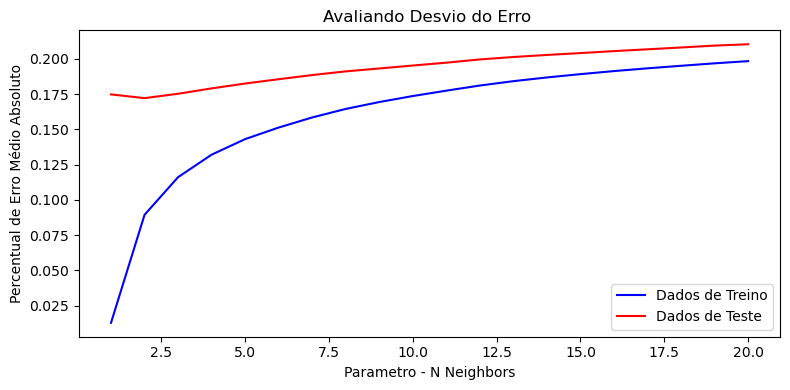

In [209]:
# Gerando um gráfico para avaliarmos o melhor parametro para ajuste fino.
plt.plot(n_neighbors, mape_lista_erro_treino, color = 'blue', label="Dados de Treino")
plt.plot(n_neighbors, mape_lista_erro_teste, color = 'red', label="Dados de Teste")
plt.title("Avaliando Desvio do Erro ")
plt.legend(loc="lower right")
plt.xlabel("Parametro - N Neighbors")
plt.ylabel("Percentual de Erro Médio Absoluto")
plt.show()

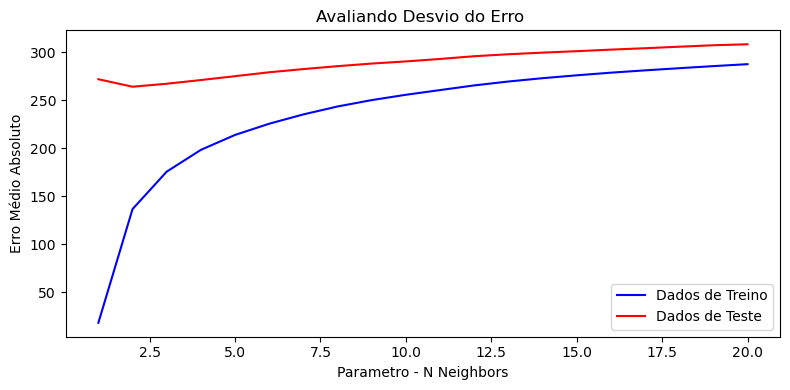

In [210]:
# Gerando um gráfico para avaliarmos o melhor parametro para ajuste fino.
plt.plot(n_neighbors, mae_lista_erro_treino, color = 'blue', label="Dados de Treino")
plt.plot(n_neighbors, mae_lista_erro_teste, color = 'red', label="Dados de Teste")
plt.title("Avaliando Desvio do Erro ")
plt.legend(loc="lower right")
plt.xlabel("Parametro - N Neighbors")
plt.ylabel("Erro Médio Absoluto")
plt.show()

In [211]:
# Construção do modelo
knn = neighbors.KNeighborsRegressor(n_neighbors = 10)

# Construção e treino do modelo
knn = knn.fit(X_treino_padronizados, Y_treino)

In [212]:
# Previsões e Acuracia - Treino
previsoes = knn.predict(X_treino_padronizados)
print('MAE: ', mean_absolute_error(previsoes, Y_treino))
print('MAPE: ', mean_absolute_percentage_error(previsoes, Y_treino))

MAE:  255.65343708965665
MAPE:  0.16201194814366565


In [213]:
# Previsões e Acuracia - Teste
previsoes = knn.predict(X_teste_padronizados)
mean_absolute_error(previsoes, Y_teste)
print('MAE: ', mean_absolute_error(previsoes, Y_teste))
print('MAPE: ', mean_absolute_percentage_error(previsoes, Y_teste))

MAE:  290.4176149817034
MAPE:  0.18568195354541753


In [217]:
# Vamos entender se neste caso o erro é Baixa ou Alto...

pd.options.display.float_format = '{:.2f}'.format
df_avaliacao = pd.DataFrame()
df_avaliacao['Valor_Real'] = Y_teste
df_avaliacao['Valor_Previsto'] = previsoes
df_avaliacao.reset_index(drop = True, inplace = True)
df_avaliacao.head(10)        

Valor_Real  Valor_Previsto
0     1175.00         1707.00
1     1315.00         1043.40
2     4654.00         4719.80
3     3390.00         3417.30
4      649.00         1080.10
5     1095.00         1524.50
6     2225.00         2198.50
7     2659.00         2350.40
8     1888.00         1094.90
9     3430.00         1735.60

In [218]:
# Vamos verificar o valor real médio do aluguel
df_avaliacao['Valor_Real'].mean()

1519.167934275669

In [219]:
# Calculando o erro do modelo
df_avaliacao['erro'] = df_avaliacao['Valor_Real'] - df_avaliacao['Valor_Previsto']
df_avaliacao.head(10)

# Considerações Importantes:
# Quando a previsão é menor que o valor real então dizemos que temos um valor sub estimado
# Quando a previsão é maior que o valor real então dizemos que temos um valor super estimado

# Precisamos achar um número que resuma esse erro, porém se somar simplesmente os valores dos erros iremos ter os 
# valores positivos anulando os valores negativos

Valor_Real  Valor_Previsto    erro
0     1175.00         1707.00 -532.00
1     1315.00         1043.40  271.60
2     4654.00         4719.80  -65.80
3     3390.00         3417.30  -27.30
4      649.00         1080.10 -431.10
5     1095.00         1524.50 -429.50
6     2225.00         2198.50   26.50
7     2659.00         2350.40  308.60
8     1888.00         1094.90  793.10
9     3430.00         1735.60 1694.40

In [220]:
# Precisamos ter o valor absoluto do erro, ou seja, deixaremos tudo com valores positivos
# Para transformar o valor negativo em positivo, ou seja, vamos utilizar o valor absoluto da variável Erro

df_avaliacao['erro_abs'] = np.abs(df_avaliacao['erro'])
df_avaliacao.head(10)

Valor_Real  Valor_Previsto    erro  erro_abs
0     1175.00         1707.00 -532.00    532.00
1     1315.00         1043.40  271.60    271.60
2     4654.00         4719.80  -65.80     65.80
3     3390.00         3417.30  -27.30     27.30
4      649.00         1080.10 -431.10    431.10
5     1095.00         1524.50 -429.50    429.50
6     2225.00         2198.50   26.50     26.50
7     2659.00         2350.40  308.60    308.60
8     1888.00         1094.90  793.10    793.10
9     3430.00         1735.60 1694.40   1694.40

In [221]:
## Calculando a métrica MAE - Mean Absolute Error - Erro Médio Absoluto

## Podemos fazer o calculo dessa forma...
print('MAE: ', np.sum(df_avaliacao['erro_abs']) / len(df_avaliacao['erro_abs']))

## Ou utilizar a função do Numpy que já calcula a média...
print('MAE: ', np.mean(df_avaliacao['erro_abs']))

MAE:  290.4176149817034
MAE:  290.4176149817034


In [222]:
# Esse valor é alto ou baixo ? 
# Tudo depende dos valores do nosso conjunto de dados
## Se temos casos que possuem valores na média de 5 mil por exemplo esse valor seria um erro baixo... mas ao contrário....
## Se tivermos casos que os valores estão entre 500...600....  então um erro desse valor seria alto...

# Por isso que precisamos relativar isso....e avaliar também o percentual desse erro...


# Vamos encontrar o percentual de erro para cada observação Real x Prevista
df_avaliacao['erro_percentual'] =  ((df_avaliacao['Valor_Real'] - df_avaliacao['Valor_Previsto']) / df_avaliacao['Valor_Real'])
df_avaliacao.head()

Valor_Real  Valor_Previsto    erro  erro_abs  erro_percentual
0     1175.00         1707.00 -532.00    532.00            -0.45
1     1315.00         1043.40  271.60    271.60             0.21
2     4654.00         4719.80  -65.80     65.80            -0.01
3     3390.00         3417.30  -27.30     27.30            -0.01
4      649.00         1080.10 -431.10    431.10            -0.66

In [223]:
# Porém precisamos também encontrar o valor absoluto desse percentual, assim como fizemos com o Erro
df_avaliacao['erro_percentual_abs'] =  np.abs(df_avaliacao['erro_percentual'])
df_avaliacao.head()

Valor_Real  Valor_Previsto    erro  erro_abs  erro_percentual  \
0     1175.00         1707.00 -532.00    532.00            -0.45   
1     1315.00         1043.40  271.60    271.60             0.21   
2     4654.00         4719.80  -65.80     65.80            -0.01   
3     3390.00         3417.30  -27.30     27.30            -0.01   
4      649.00         1080.10 -431.10    431.10            -0.66   

   erro_percentual_abs  
0                 0.45  
1                 0.21  
2                 0.01  
3                 0.01  
4                 0.66

In [224]:
## Calculando a métrica MAPE - Mean Absolute Percentage Error - Erro Percentual Médio Absoluto

## Podemos fazer o calculo dessa forma...
print('MAPE: ', np.sum(df_avaliacao['erro_percentual_abs']) / len(df_avaliacao['erro_percentual_abs']))

## Ou utilizar a função do Numpy que já calcula a média...
print('MAPE: ', np.mean(df_avaliacao['erro_percentual_abs']))

MAPE:  0.19524463970253209
MAPE:  0.19524463970253209


In [225]:
# Visualizando o percentual arredondado
print('MAPE: ', round(np.mean(df_avaliacao['erro_percentual_abs']) * 100,0))

MAPE:  20.0


In [226]:
# Podemos também encontrar outra métrica de erro...
# Ao elevar ao quadrado não teremos mais o valor negativo, porém observe que teremos um valor bem alto...
df_avaliacao['erro_minimo_quadrado'] =  (df_avaliacao['Valor_Real'] - df_avaliacao['Valor_Previsto']) ** 2

df_avaliacao.head()

Valor_Real  Valor_Previsto    erro  erro_abs  erro_percentual  \
0     1175.00         1707.00 -532.00    532.00            -0.45   
1     1315.00         1043.40  271.60    271.60             0.21   
2     4654.00         4719.80  -65.80     65.80            -0.01   
3     3390.00         3417.30  -27.30     27.30            -0.01   
4      649.00         1080.10 -431.10    431.10            -0.66   

   erro_percentual_abs  erro_minimo_quadrado  
0                 0.45             283024.00  
1                 0.21              73766.56  
2                 0.01               4329.64  
3                 0.01                745.29  
4                 0.66             185847.21

In [227]:
## Calculando a métrica LSE - Least Square Error - Erro Minimo Quadrado

## Podemos fazer o calculo dessa forma...
print('LSE: ', np.sum(df_avaliacao['erro_minimo_quadrado']) / len(df_avaliacao['erro_minimo_quadrado']))

## Ou utilizar a função do Numpy que já calcula a média...
print('LSE: ', np.mean(df_avaliacao['erro_minimo_quadrado']))

LSE:  237501.61927746283
LSE:  237501.61927746283


In [228]:
## Calculando a métrica RMSE - Root Mean Squared Error - Raiz do Erro Quadratico Médio

# Já temos o erro minimo quadrado, então basta tirarmos a raiz quadrada desse erro
print('RMSE: ', np.sqrt(np.mean(df_avaliacao['erro_minimo_quadrado'])))

RMSE:  487.3413785812393
